In [1]:
library(ggplot2)
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




# Day csv

In [2]:
day = read.csv("Bike-Sharing-Dataset//day.csv", header = TRUE)
myday = day
head(myday)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985
2,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801
3,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349
4,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562
5,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600
6,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606


In [3]:
day$dteday = as.Date(day$dteday, format = "%Y-%m-%d") # converting 'dteday' column to date

In [4]:
head(day, 10)
colSums(is.na(day))

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<date>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985
2,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801
3,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349
4,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562
5,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600
6,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606
7,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.1687260,148,1362,1510
8,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.2668040,68,891,959
9,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.3619500,54,768,822


instant     dteday     season         yr       mnth    holiday    weekday 
         0          0          0          0          0          0          0 
workingday weathersit       temp      atemp        hum  windspeed     casual 
         0          0          0          0          0          0          0 
registered        cnt 
         0          0

In [5]:
str(day)

'data.frame':	731 obs. of  16 variables:
 $ instant   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ dteday    : Date, format: "2011-01-01" "2011-01-02" ...
 $ season    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ yr        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mnth      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ holiday   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday   : int  6 0 1 2 3 4 5 6 0 1 ...
 $ workingday: int  0 0 1 1 1 1 1 0 0 1 ...
 $ weathersit: int  2 2 1 1 1 1 2 2 1 1 ...
 $ temp      : num  0.344 0.363 0.196 0.2 0.227 ...
 $ atemp     : num  0.364 0.354 0.189 0.212 0.229 ...
 $ hum       : num  0.806 0.696 0.437 0.59 0.437 ...
 $ windspeed : num  0.16 0.249 0.248 0.16 0.187 ...
 $ casual    : int  331 131 120 108 82 88 148 68 54 41 ...
 $ registered: int  654 670 1229 1454 1518 1518 1362 891 768 1280 ...
 $ cnt       : int  985 801 1349 1562 1600 1606 1510 959 822 1321 ...


The dateday column has been explicitly converted to date format, it was 'char' by default.

In [6]:
dim(day)

[1] 731  16

In [7]:
day$rawtemp = day$temp*41 # converting temp to raw form from normalized form
head(day)$rawtemp
day$rawatemp = day$atemp*50 # converting atemp to raw form from normalized form
head(day)$rawatemp
day$rawhum = day$hum*100 # converting hum to raw form from normalized form
head(day)$rawhum
day$rawwindspeed = day$windspeed*67 # converting windspeed to raw form from normalized form
head(day)$rawwindspeed

[1] 14.110847 14.902598  8.050924  8.200000  9.305237  8.378268

[1] 18.18125 17.68695  9.47025 10.60610 11.46350 11.66045

[1] 80.5833 69.6087 43.7273 59.0435 43.6957 51.8261

[1] 10.749882 16.652113 16.636703 10.739832 12.522300  6.000868

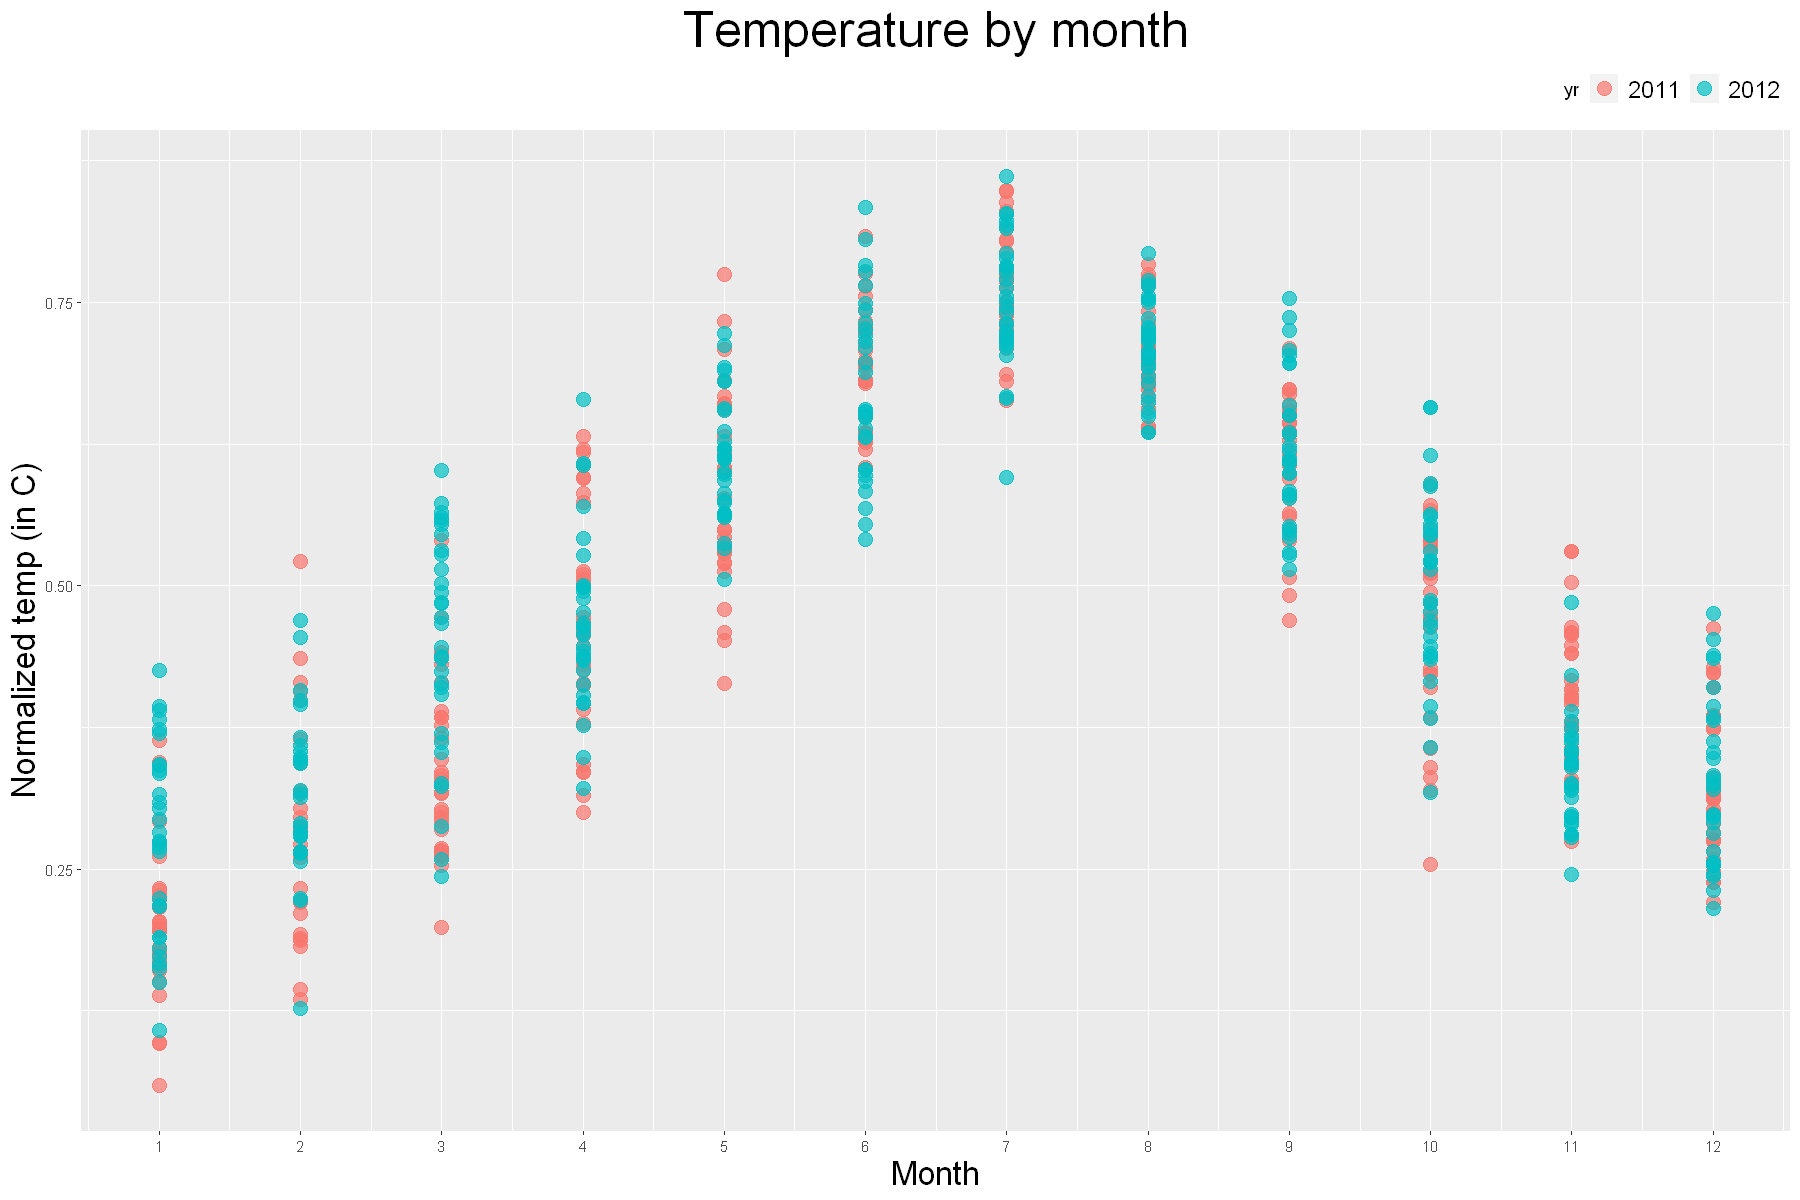

In [10]:
mydata = day

# converting factor values from 0, 1 to 2011, 2012
mydata$yr <- ifelse(mydata$yr == 0, 2011, 2012)
mydata$yr = factor(mydata$yr)

options(repr.plot.width = 15, repr.plot.height = 10)

ggplot(mydata, aes(x = mnth, y = temp, color = yr)) +
  geom_point(size= 4, alpha = 0.7) +
scale_x_continuous(breaks = seq(1, 12, by = 1)) + 
labs(title = "Temperature by month", x = "Month", y = "Normalized temp (in C)") +
theme(axis.title.x = element_text(size = 20), 
      axis.title.y = element_text(size = 20), 
      plot.title = element_text(size = 30, hjust = 0.5),
      legend.position = "top", legend.justification = "right",
      legend.text = element_text(size = 14))
# scale_x_continuous(breaks = seq(1, 12, by = 1))

# Monthly averages for both years (using day csv)

In [12]:
# creating monthly averages for the year 2011

year_2011 <- subset(day, yr == 0)
avg_counts_2011 <- aggregate(cnt ~ mnth, data = year_2011, FUN = mean)
avg_counts_2011$yr = 2011
avg_counts_2011$yr = factor(avg_counts_2011$yr)

# creating monthly averages for the year 2012

year_2012 <- subset(day, yr == 1)
avg_counts_2012 <- aggregate(cnt ~ mnth, data = year_2012, FUN = mean)
avg_counts_2012$yr = 2012
avg_counts_2012$yr = factor(avg_counts_2012$yr)

# combining monthly averages for both the months

myavg = rbind(avg_counts_2011, avg_counts_2012)

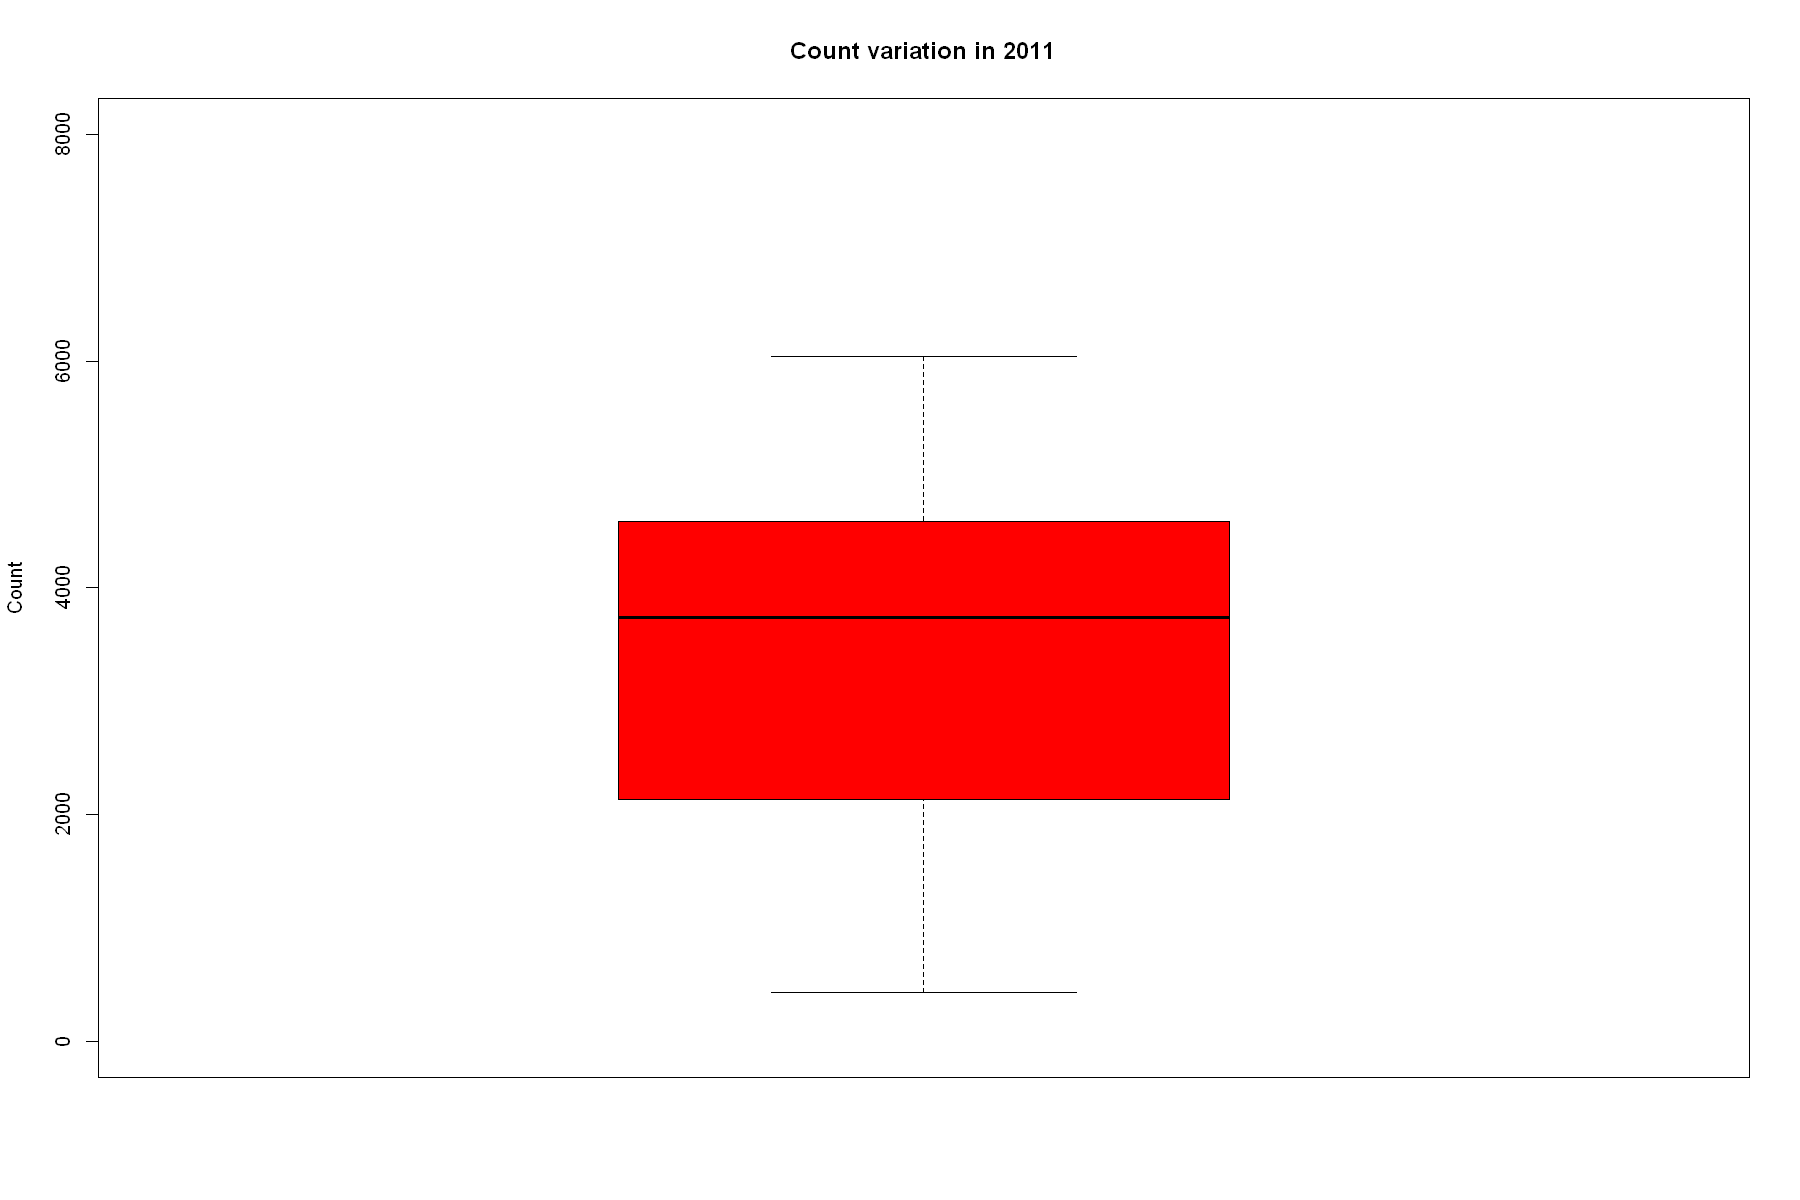

In [13]:
boxplot(year_2011$cnt, main = "Count variation in 2011", ylab = "Count", col = "red", ylim = c(0, 8000))

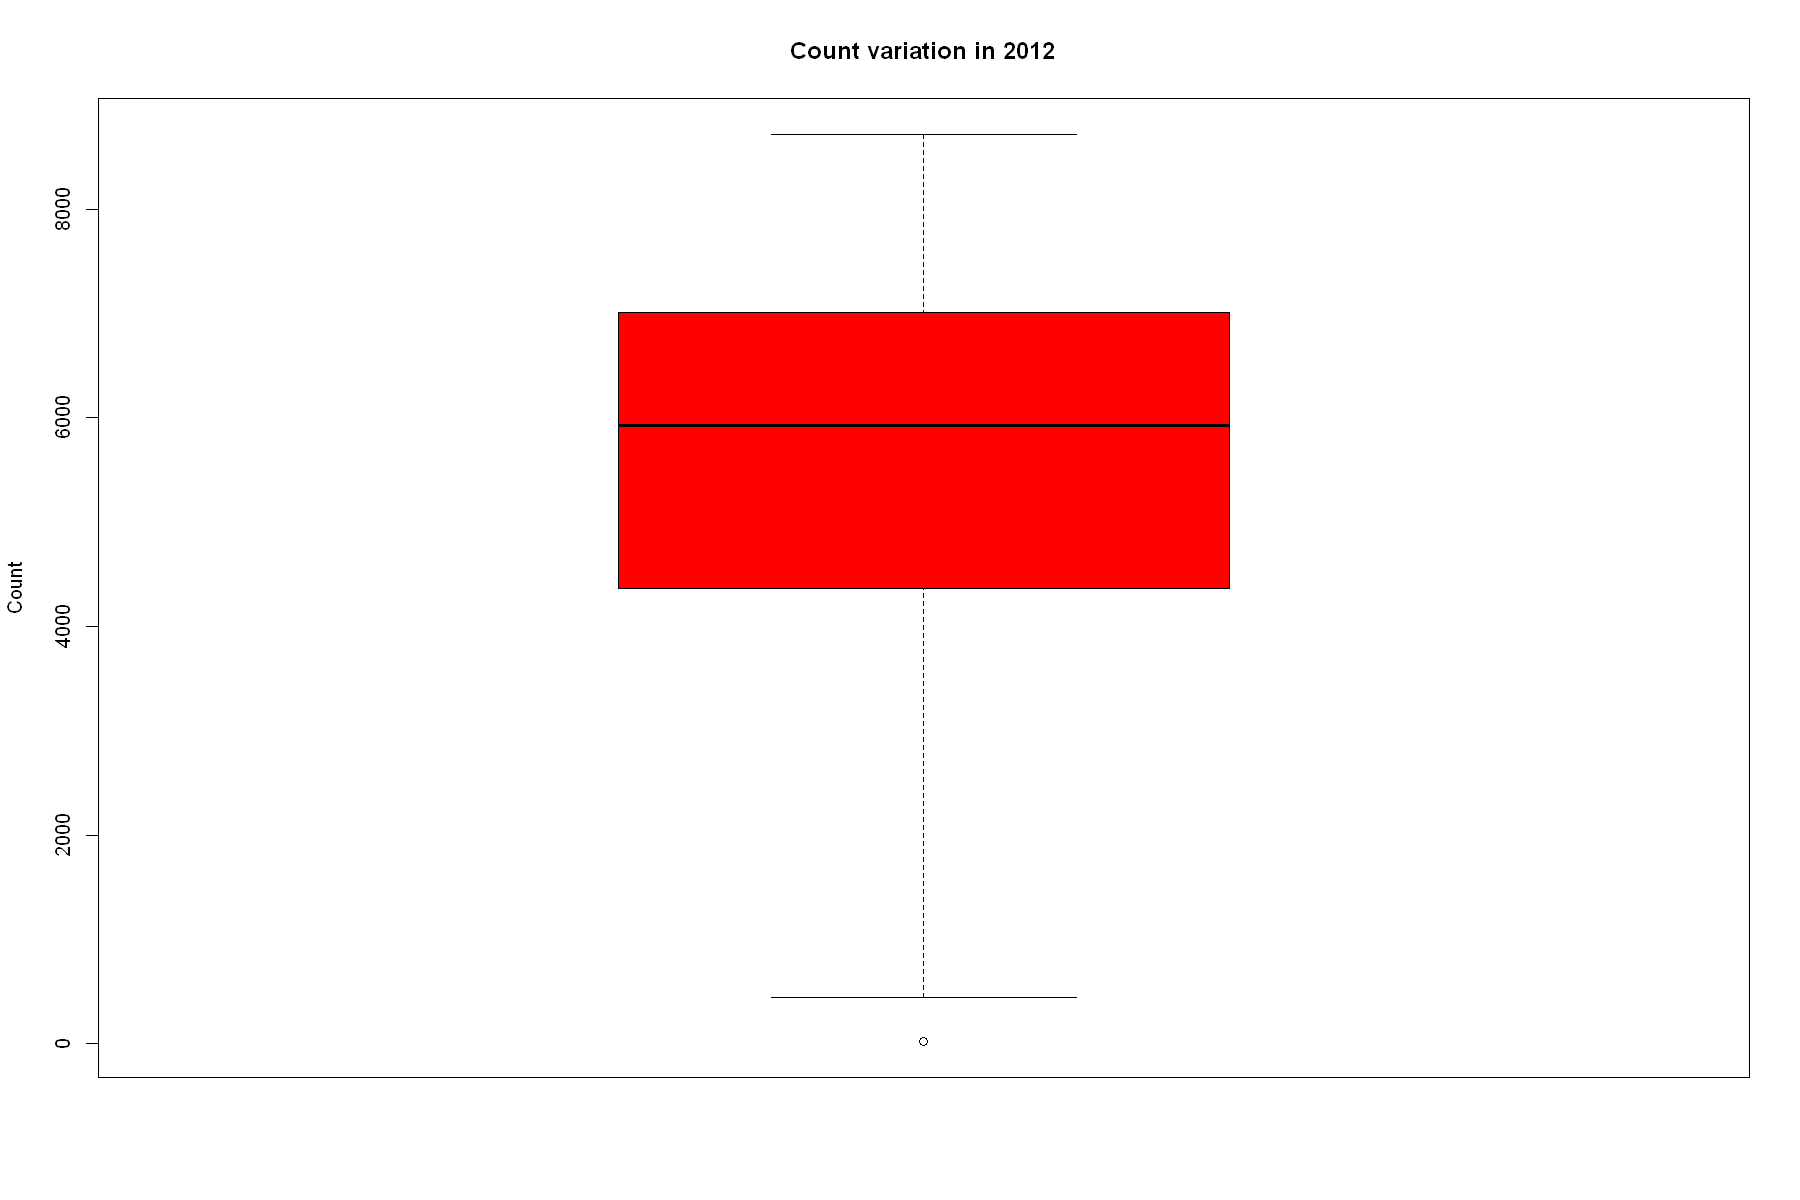

In [14]:
boxplot(year_2012$cnt, main = "Count variation in 2012", ylab = "Count", col = "red")

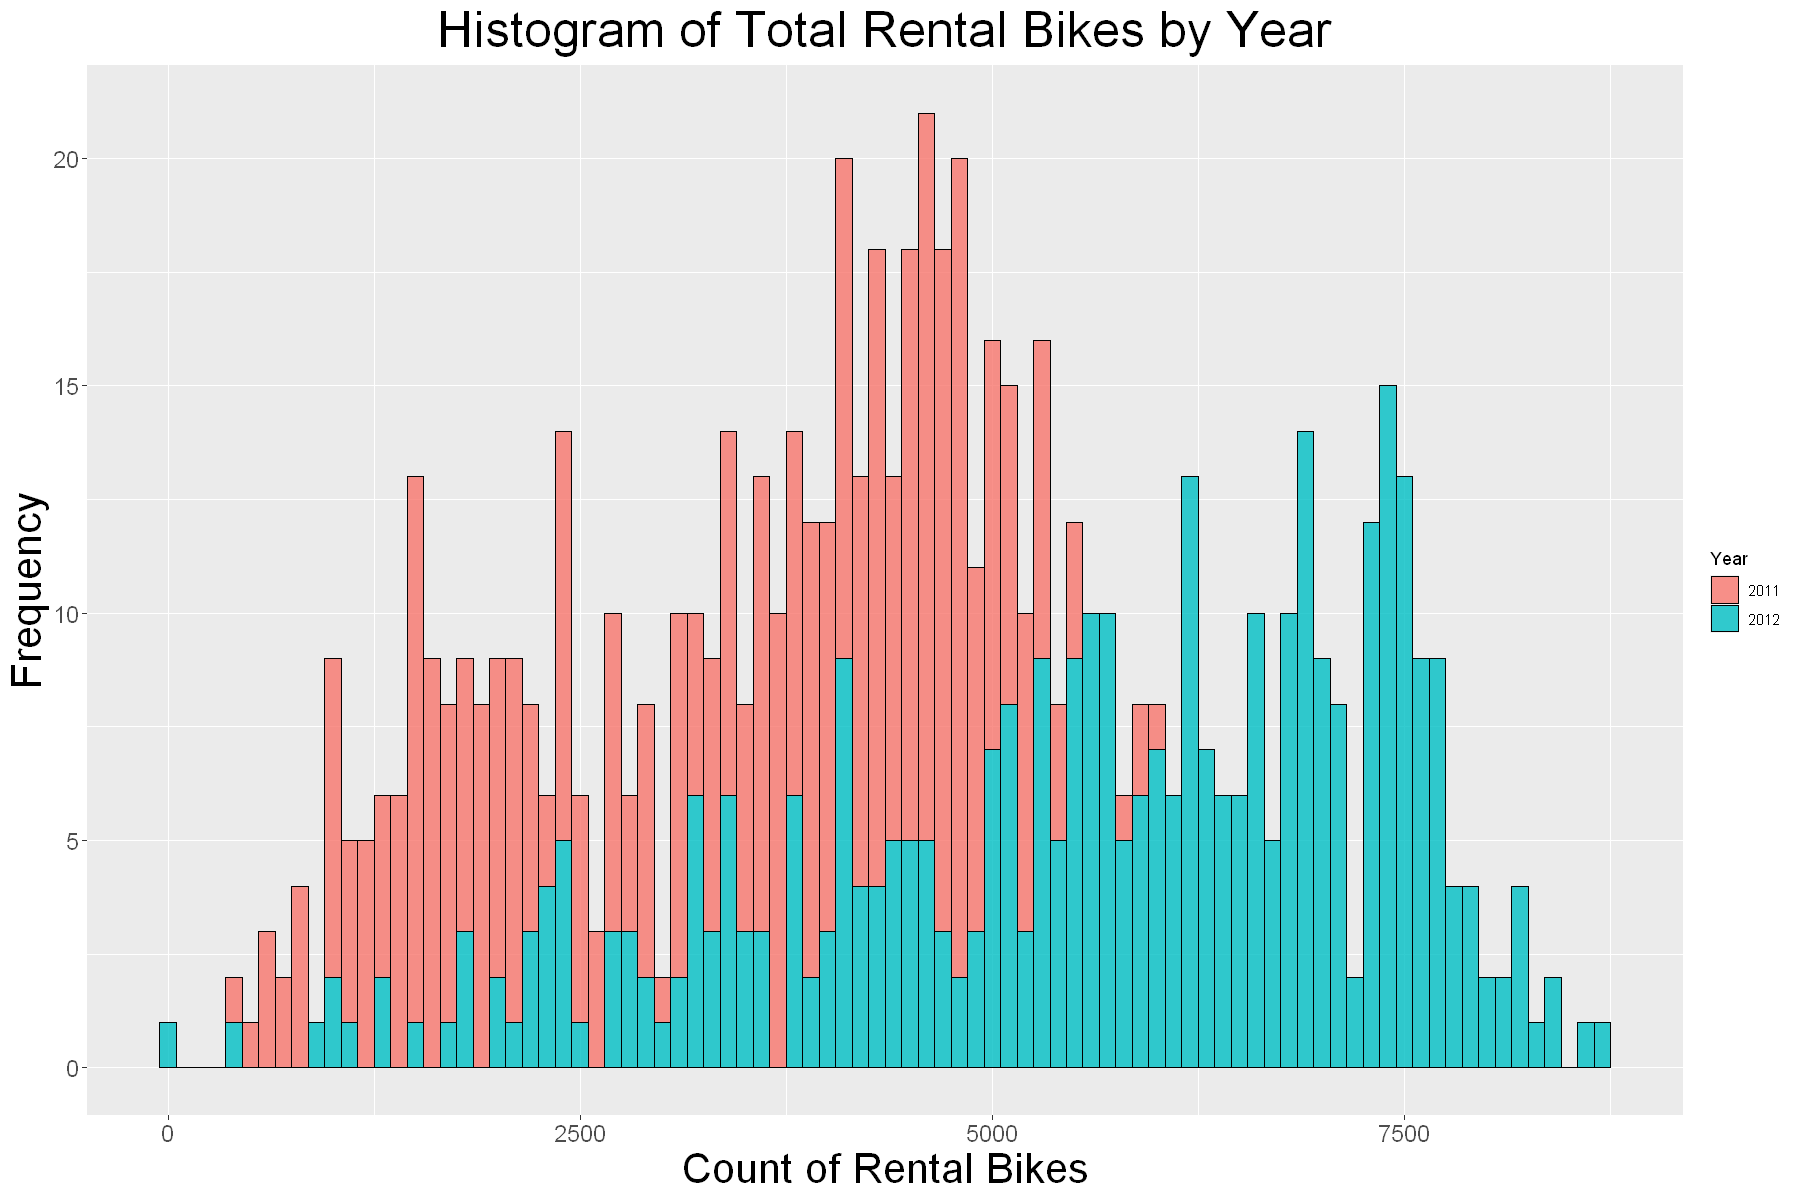

In [15]:
ggplot(day, aes(x = cnt, fill = factor(yr))) + 
geom_histogram(binwidth = 100, color = "black", alpha = 0.8) +
labs(title = "Histogram of Total Rental Bikes by Year", 
   x = "Count of Rental Bikes", 
   y = "Frequency") +
scale_fill_discrete(name = "Year", labels = c("2011", "2012")) +
scale_color_manual(values = c('#3493bf', '#c74448')) +
theme(axis.title.x = element_text(size = 25), 
axis.title.y = element_text(size = 25), 
plot.title = element_text(size = 30, hjust = 0.5),
axis.text.y = element_text(size = 14),
axis.text.x = element_text(size = 14)) 

From the histograms, we can see that 'cnt' variable is not normally distributed. We can perform another test to confirm this.

## Shapiro Wilk test to test for the normality of the response variable (cnt)

In [16]:
shapiro.test(day$cnt)


	Shapiro-Wilk normality test

data:  day$cnt
W = 0.98012, p-value = 2.081e-08


pvalue is less than a significance level ($\alpha$) of 0.05 hence we do not have enough evidence to support the null hypothesis and we conclude that the values do not come from a normal distribution.

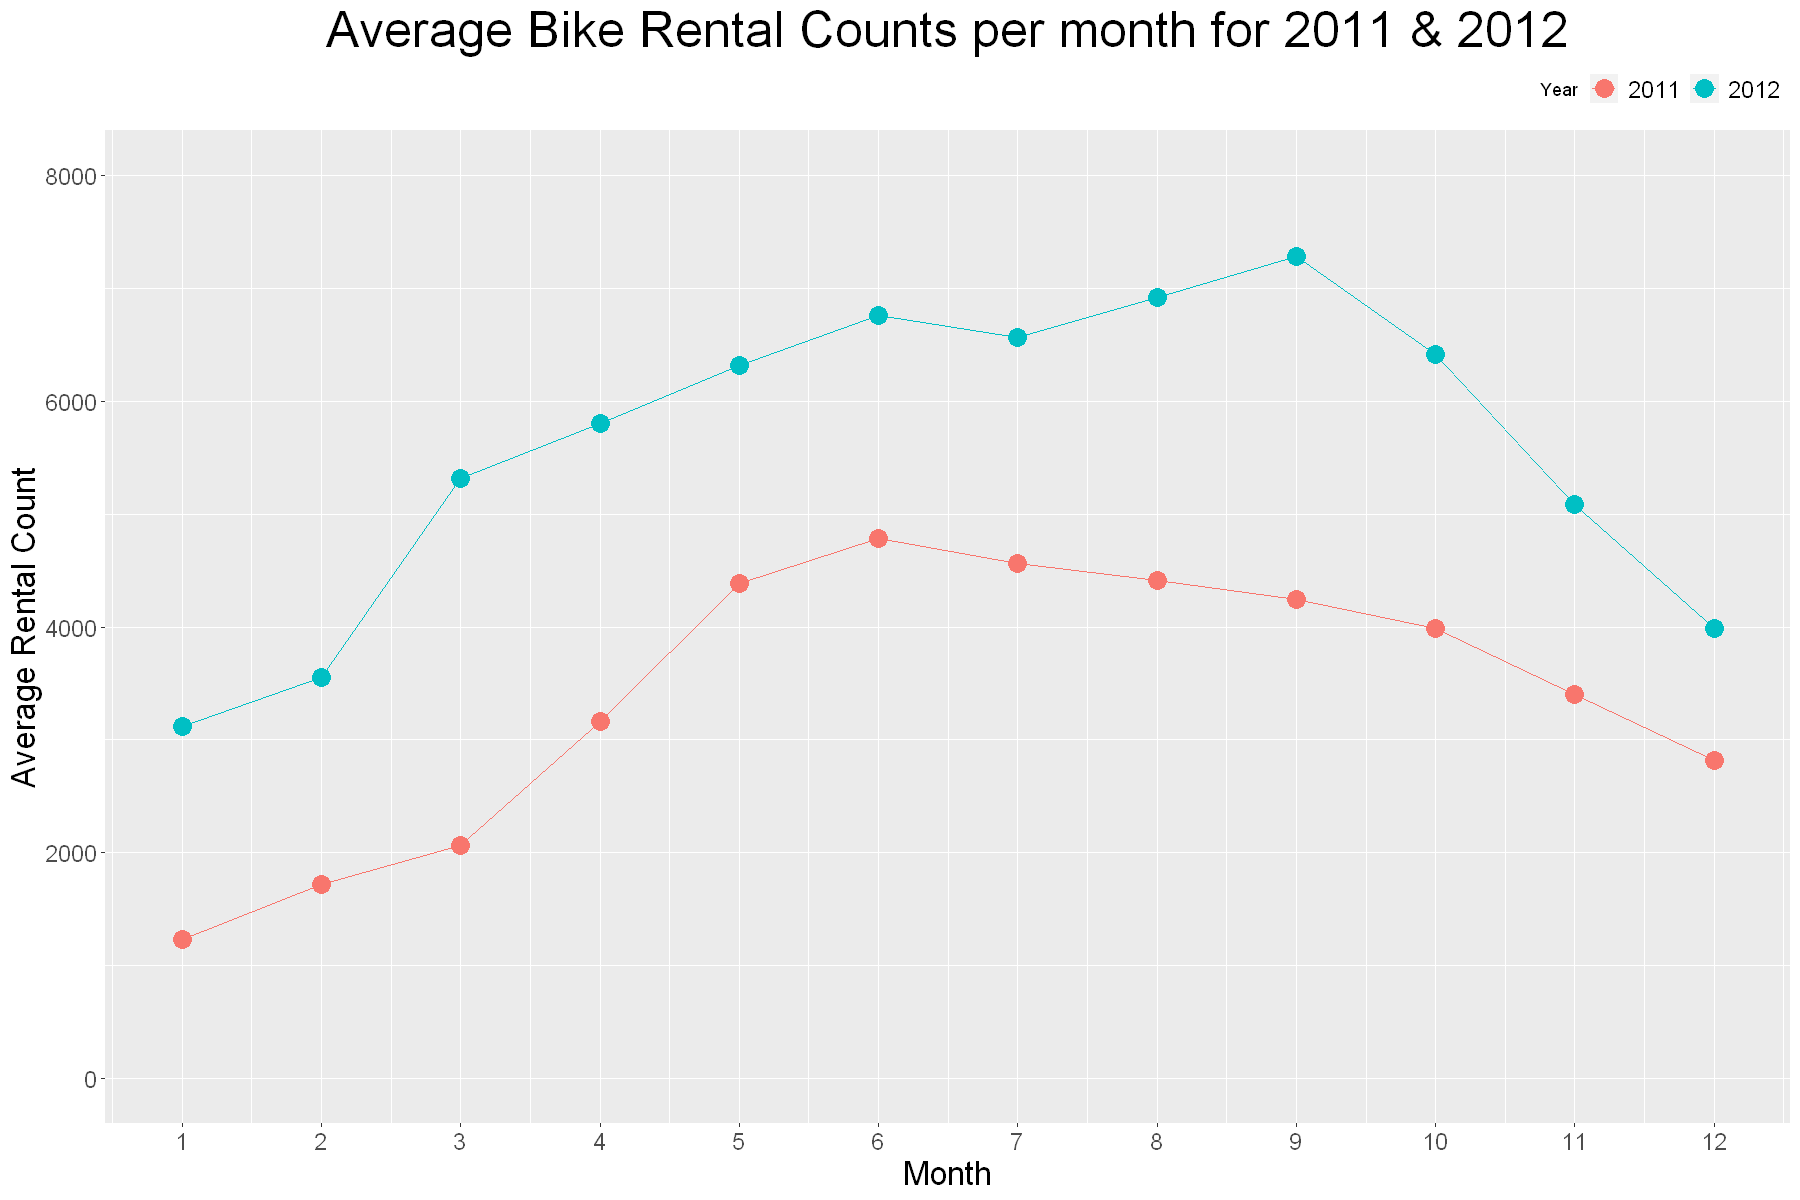

In [17]:
options(repr.plot.width = 15, repr.plot.height = 10)

ggplot(myavg, aes(x = mnth, y = cnt, color = yr)) +
  geom_point(size= 5) +
  geom_line() +
  labs(title = "Average Bike Rental Counts per month for 2011 & 2012",
       x = "Month",
       y = "Average Rental Count",
       color = "Year") +
theme(axis.title.x = element_text(size = 20), 
      axis.title.y = element_text(size = 20), 
      plot.title = element_text(size = 30, hjust = 0.5),
      legend.position = "top", legend.justification = "right",
      legend.text = element_text(size = 14),
      axis.text.x = element_text(size = 14),
      axis.text.y = element_text(size = 14)) +
scale_x_continuous(breaks = seq(1, 12, by = 1)) + 
scale_y_continuous(limits = c(0, 8000), breaks = seq(0, 8000, 2000))

In [18]:
head(day)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,rawtemp,rawatemp,rawhum,rawwindspeed
,<int>,<date>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985,14.110847,18.18125,80.5833,10.749882
2,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801,14.902598,17.68695,69.6087,16.652113
3,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349,8.050924,9.47025,43.7273,16.636703
4,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562,8.200000,10.60610,59.0435,10.739832
5,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600,9.305237,11.46350,43.6957,12.522300
6,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606,8.378268,11.66045,51.8261,6.000868


In [19]:
max(day$rawhum)

[1] 97.25

`geom_smooth()` using formula 'y ~ x'



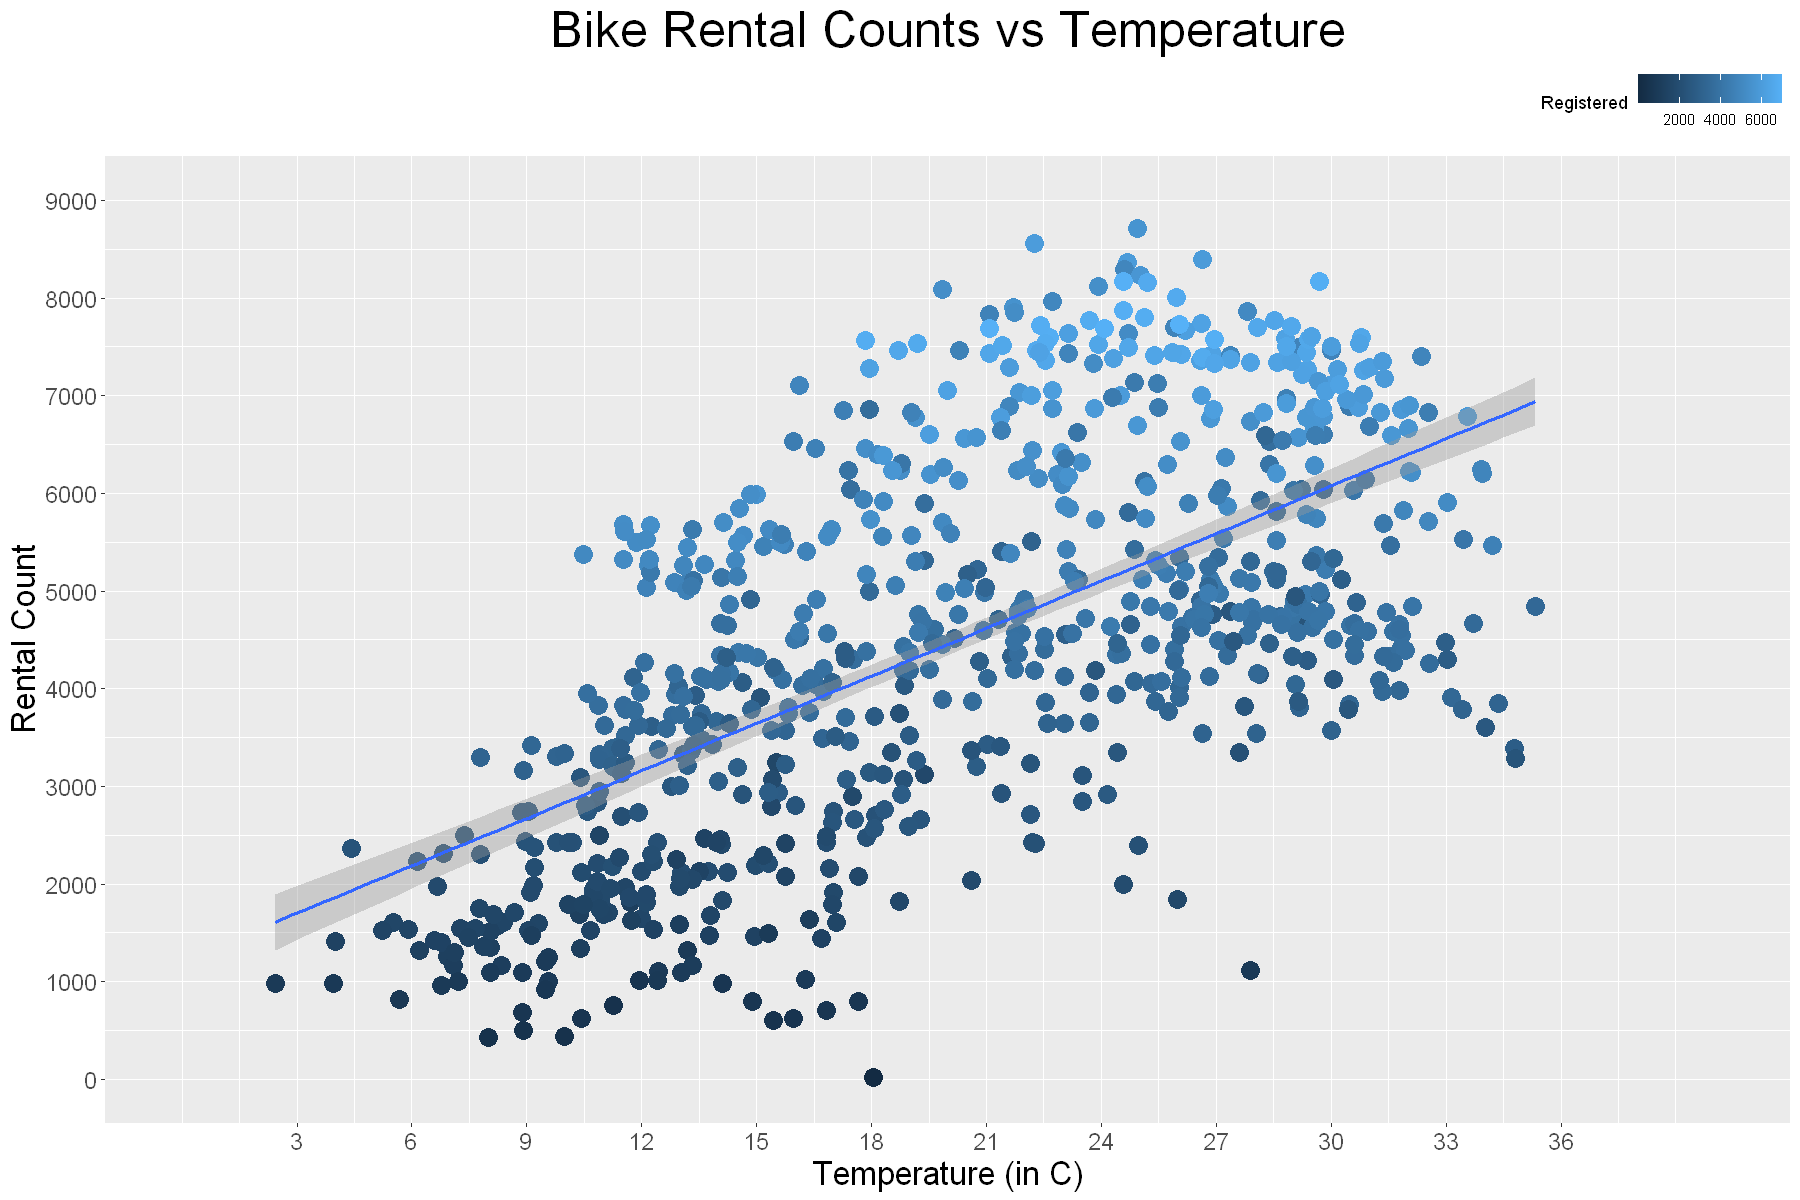

In [20]:
options(repr.plot.width = 15, repr.plot.height = 10)

ggplot(day, aes(x = rawtemp, y = cnt, color = registered)) +
  geom_point(size= 5) +
  labs(title = "Bike Rental Counts vs Temperature",
       x = "Temperature (in C)",
       y = "Rental Count",
       color = "Registered") +
geom_smooth(method='lm') +
theme(axis.title.x = element_text(size = 20), 
      axis.title.y = element_text(size = 20), 
      plot.title = element_text(size = 30, hjust = 0.5),
      legend.position = "top", legend.justification = "right",
      legend.text = element_text(size = 9),
      axis.text.x = element_text(size = 14),
      axis.text.y = element_text(size = 14)) +
scale_x_continuous(limits = c(0, 40), breaks = seq(3, 36, by=3 )) +
scale_y_continuous(limits = c(0, 9000), breaks = seq(0, 9000, 1000))

Above plot shows that 

`geom_smooth()` using formula 'y ~ x'



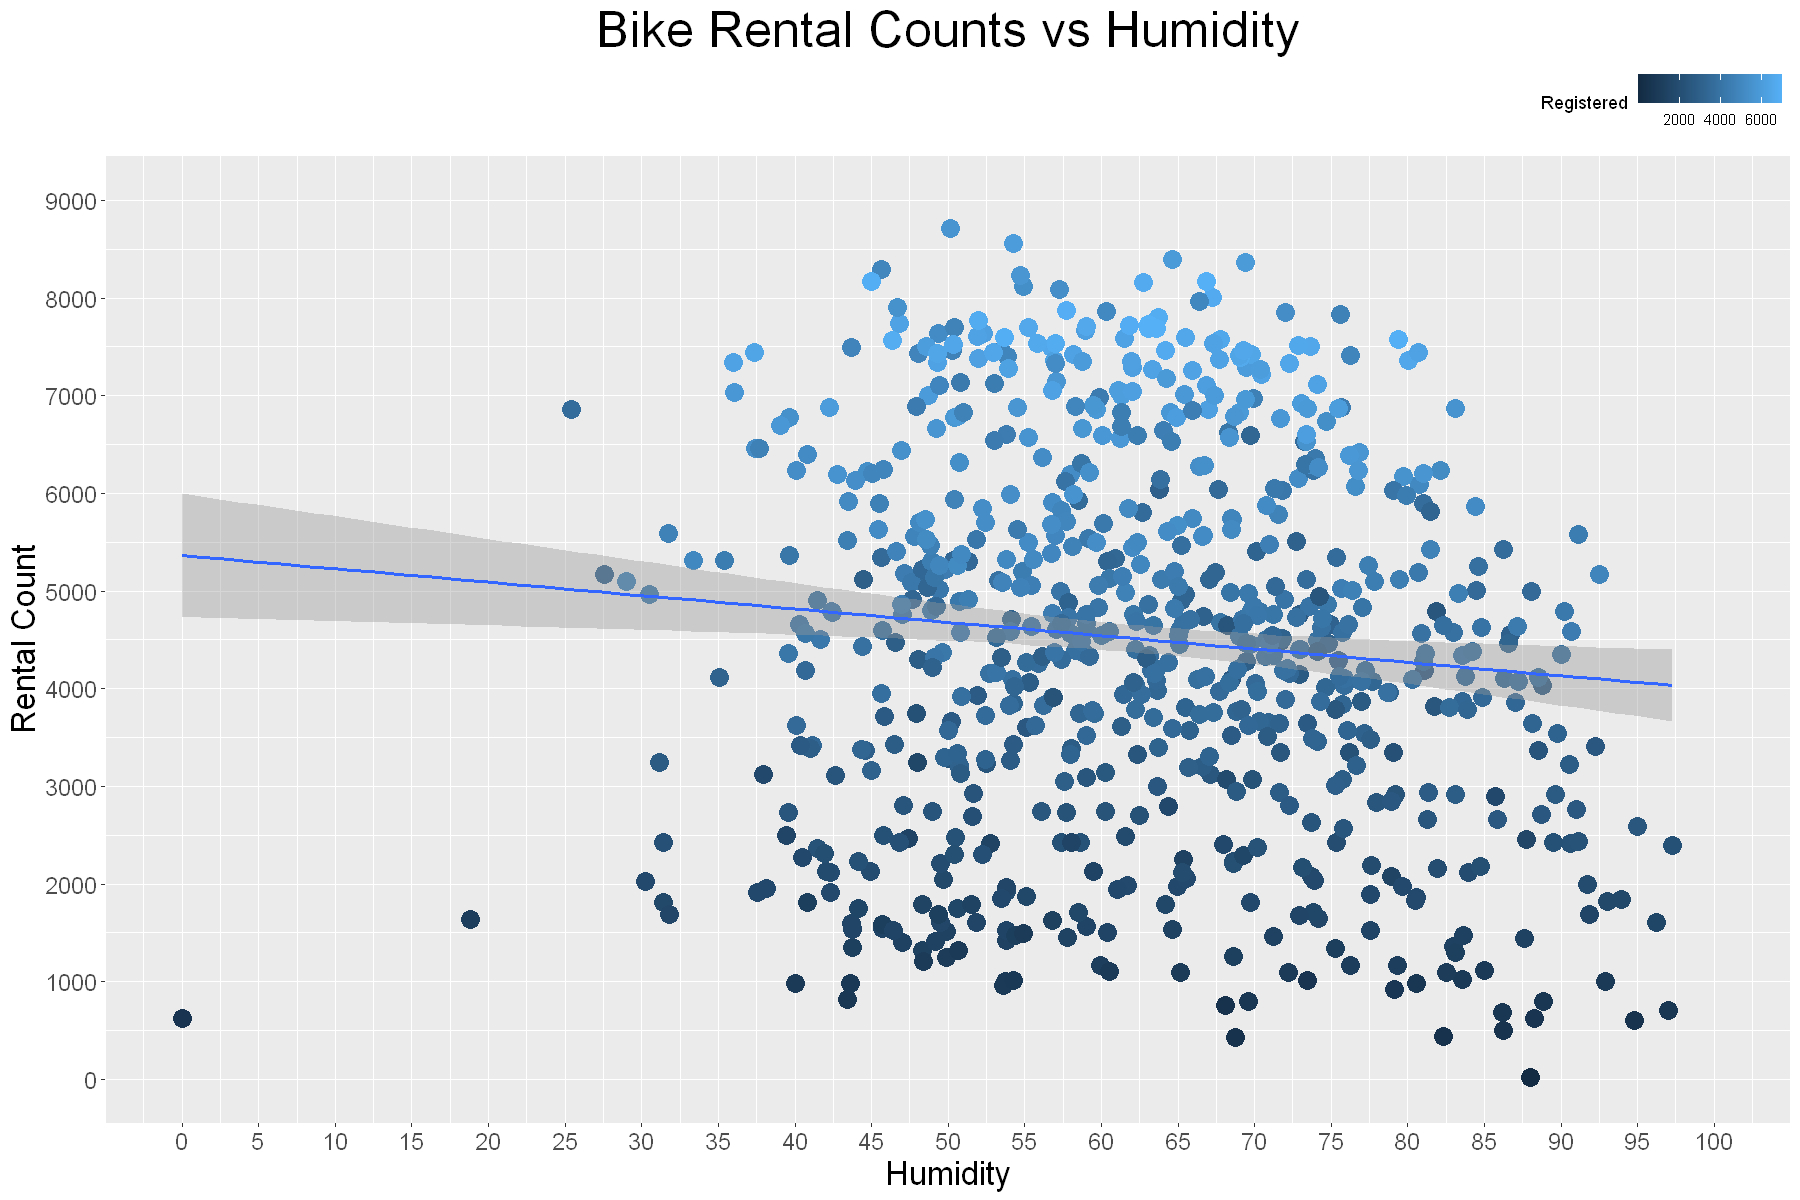

In [21]:
options(repr.plot.width = 15, repr.plot.height = 10)

ggplot(day, aes(x = rawhum, y = cnt, color = registered)) +
  geom_point(size= 5) +
  labs(title = "Bike Rental Counts vs Humidity",
       x = "Humidity",
       y = "Rental Count",
       color = "Registered") + 
geom_smooth(method='lm') +
theme(axis.title.x = element_text(size = 20), 
      axis.title.y = element_text(size = 20), 
      plot.title = element_text(size = 30, hjust = 0.5),
      legend.position = "top", legend.justification = "right",
      legend.text = element_text(size = 9),
      axis.text.x = element_text(size = 14),
      axis.text.y = element_text(size = 14)) +
scale_x_continuous(limits = c(0, 100), breaks = seq(0, 100, by=5 )) +
scale_y_continuous(limits = c(0, 9000), breaks = seq(0, 9000, 1000))

In [22]:
daytt = read.csv("Bike-Sharing-Dataset//day.csv", header = TRUE)
hourtt = read.csv("Bike-Sharing-Dataset//hour.csv", header = TRUE)
daytt$dteday = as.Date(daytt$dteday, format = "%Y-%m-%d") # converting 'dtedaytt' column to date
hourtt$dteday = as.Date(hourtt$dteday, format = "%Y-%m-%d") # converting 'dtedaytt' column to date

# 80-20 split

train_indices <- sample(nrow(daytt), round(0.8*nrow(daytt)), replace = FALSE)
train80 <- daytt[train_indices, ]
test80 <- daytt[-train_indices, ]

model80 <- lm(cnt ~ ., data = train80)
summary(model80)

predictions <- predict(model80, newdata = test80)
mse80 <- mean((predictions - test80$cnt)^2)
cat("MSE of the model:", round(mse80, 2))

# 70-30 split

train_indices <- sample(nrow(daytt), round(0.7*nrow(daytt)), replace = FALSE)
train70 <- daytt[train_indices, ]
test70 <- daytt[-train_indices, ]

model70 <- lm(cnt ~ ., data = train70)
summary(model70)

predictions <- predict(model70, newdata = test70)
mse70 <- mean((predictions - test70$cnt)^2)
cat("MSE of the model:", round(mse70, 2))

# 50-50 split

train_indices <- sample(nrow(daytt), round(0.5*nrow(daytt)), replace = FALSE)
train50 <- daytt[train_indices, ]
test50 <- daytt[-train_indices, ]

model50 <- lm(cnt ~ ., data = train50)
summary(model50)

predictions <- predict(model50, newdata = test50)
mse50 <- mean((predictions - test50$cnt)^2)
cat("MSE of the model:", round(mse50, 2))

Warning message in summary.lm(model80):
"essentially perfect fit: summary may be unreliable"



Call:
lm(formula = cnt ~ ., data = train80)

Residuals:
       Min         1Q     Median         3Q        Max 
-3.043e-11 -2.980e-13 -6.600e-14  2.070e-13  4.607e-11 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept) -8.762e-13  8.383e-13 -1.045e+00   0.2964    
instant     -1.098e-14  1.231e-14 -8.920e-01   0.3729    
dteday              NA         NA         NA       NA    
season      -1.792e-12  1.942e-13 -9.226e+00   <2e-16 ***
yr           1.747e-12  4.551e-12  3.840e-01   0.7011    
mnth         5.977e-13  3.794e-13  1.575e+00   0.1157    
holiday     -1.069e-12  7.621e-13 -1.403e+00   0.1611    
weekday     -3.351e-14  5.565e-14 -6.020e-01   0.5473    
workingday  -2.310e-13  4.086e-13 -5.650e-01   0.5722    
weathersit  -1.043e-13  2.723e-13 -3.830e-01   0.7020    
temp         5.202e-12  4.359e-12  1.193e+00   0.2332    
atemp       -2.792e-12  4.927e-12 -5.670e-01   0.5712    
hum          1.715e-1

Warning message in predict.lm(model80, newdata = test80):
"prediction from a rank-deficient fit may be misleading"


MSE of the model: 0

Warning message in summary.lm(model70):
"essentially perfect fit: summary may be unreliable"



Call:
lm(formula = cnt ~ ., data = train70)

Residuals:
       Min         1Q     Median         3Q        Max 
-3.965e-11 -1.930e-13  1.180e-13  3.730e-13  1.622e-11 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept) -4.529e-12  7.151e-13 -6.333e+00 5.39e-10 ***
instant      6.778e-15  1.040e-14  6.520e-01   0.5150    
dteday              NA         NA         NA       NA    
season       5.791e-14  1.680e-13  3.450e-01   0.7304    
yr          -3.077e-12  3.843e-12 -8.010e-01   0.4237    
mnth        -2.911e-13  3.198e-13 -9.100e-01   0.3631    
holiday     -3.826e-13  5.563e-13 -6.880e-01   0.4918    
weekday     -8.880e-14  4.702e-14 -1.888e+00   0.0595 .  
workingday  -8.838e-13  3.459e-13 -2.555e+00   0.0109 *  
weathersit   1.331e-12  2.386e-13  5.576e+00 4.03e-08 ***
temp         8.566e-12  3.576e-12  2.396e+00   0.0170 *  
atemp       -5.848e-12  4.058e-12 -1.441e+00   0.1502    
hum         -6.991e-1

Warning message in predict.lm(model70, newdata = test70):
"prediction from a rank-deficient fit may be misleading"


MSE of the model: 0


Call:
lm(formula = cnt ~ ., data = train50)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.088e-10 -4.790e-13  1.500e-13  7.590e-13  2.889e-11 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept) -4.563e-12  2.692e-12 -1.695e+00  0.09092 .  
instant      7.102e-14  3.735e-14  1.902e+00  0.05804 .  
dteday              NA         NA         NA       NA    
season      -1.608e-12  5.757e-13 -2.792e+00  0.00552 ** 
yr          -2.981e-11  1.378e-11 -2.163e+00  0.03121 *  
mnth        -1.971e-12  1.160e-12 -1.699e+00  0.09018 .  
holiday      8.039e-13  2.300e-12  3.490e-01  0.72694    
weekday      5.117e-14  1.647e-13  3.110e-01  0.75624    
workingday  -4.776e-13  1.255e-12 -3.810e-01  0.70370    
weathersit   2.263e-12  8.365e-13  2.705e+00  0.00716 ** 
temp        -2.325e-12  2.340e-11 -9.900e-02  0.92093    
atemp        4.855e-12  2.659e-11  1.830e-01  0.85525    
hum         -2.469e-1

Warning message in predict.lm(model50, newdata = test50):
"prediction from a rank-deficient fit may be misleading"


MSE of the model: 0

In [23]:
bic_back <- step(model80, k = log(nrow(day)), trace = FALSE) # by default direction is "backward"
summary(bic_back)
AIC(bic_back)
BIC(bic_back)

Warning message:
"attempting model selection on an essentially perfect fit is nonsense"
Warning message:
"attempting model selection on an essentially perfect fit is nonsense"
Warning message:
"attempting model selection on an essentially perfect fit is nonsense"
Warning message:
"attempting model selection on an essentially perfect fit is nonsense"
Warning message in summary.lm(bic_back):
"essentially perfect fit: summary may be unreliable"



Call:
lm(formula = cnt ~ instant + season + mnth + holiday + weekday + 
    workingday + temp + atemp + hum + windspeed + casual + registered, 
    data = train80)

Residuals:
       Min         1Q     Median         3Q        Max 
-4.252e-12 -2.830e-13 -3.600e-14  1.810e-13  4.530e-11 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept)  2.612e-12  6.235e-13  4.189e+00 3.24e-05 ***
instant     -9.822e-16  7.148e-16 -1.374e+00  0.16992    
season      -5.297e-14  1.473e-13 -3.600e-01  0.71932    
mnth        -8.091e-14  5.008e-14 -1.616e+00  0.10669    
holiday     -3.480e-13  5.820e-13 -5.980e-01  0.55016    
weekday      1.346e-13  4.226e-14  3.186e+00  0.00152 ** 
workingday  -9.257e-13  3.099e-13 -2.987e+00  0.00294 ** 
temp        -7.713e-12  3.326e-12 -2.319e+00  0.02075 *  
atemp        5.164e-12  3.763e-12  1.372e+00  0.17055    
hum          7.568e-13  6.521e-13  1.161e+00  0.24627    
windspeed    7.877e-13  1.194e-12  6.600e-01  0.50952    


[1] -29846.73

[1] -29785.53

## Fix the raw temp column for here, see if calculation is right

In [52]:
# Group the bike sharing data by workingday and calculate the means of casual and registered rentals
workday_rentalcount <- aggregate(cbind(casual, registered) ~ workingday, data = myday, FUN = mean)
colnames(workday_rentalcount) <- c("Working_Day", "Mean_Casual", "Mean_Registered")
workday_rentalcount

# Create a data frame with the total number of bikes rented per month
monthly_bike_rental <- as.data.frame(aggregate(cbind(casual, registered, cnt) ~ mnth, data = myday, FUN = sum))
colnames(monthly_bike_rental) <- c("month", "casual_count", "registered_count", "total_count")
monthly_bike_rental

Working_Day,Mean_Casual,Mean_Registered
<int>,<dbl>,<dbl>
0,1371.134,2959.035
1,606.570,3978.250


month,casual_count,registered_count,total_count
<int>,<int>,<int>,<int>
1,12042,122891,134933
2,14963,136389,151352
3,44444,184476,228920
4,60802,208292,269094
5,75285,256401,331686
6,73906,272436,346342
7,78157,266791,344948
8,72039,279155,351194
9,70323,275668,345991


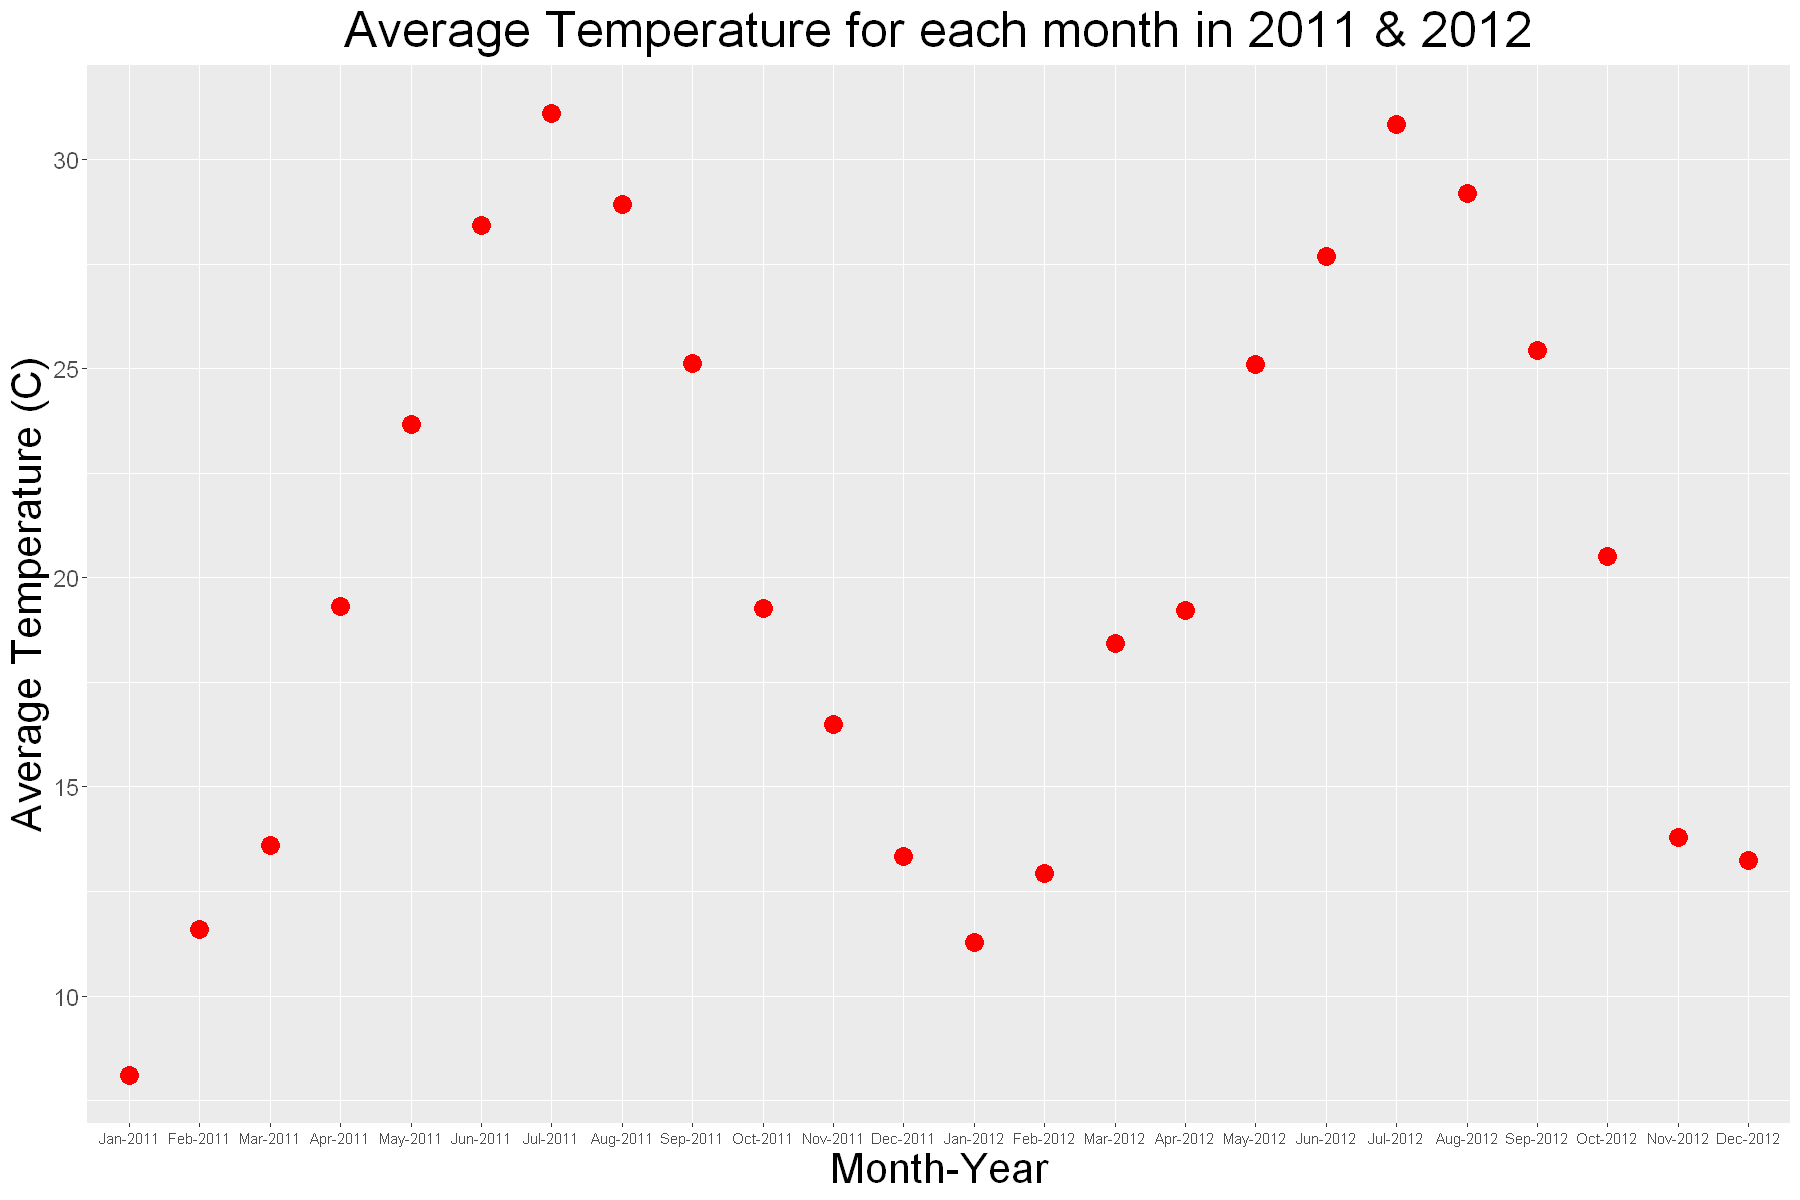

In [53]:
# aggregating data by month & year

df <- day %>% 
    mutate(month_year = format(dteday, "%Y-%m")) %>% 
    select(month_year, rawtemp)

# calculate average temperature by month and year

df_avg <- df %>% 
  group_by(month_year) %>% 
  summarise(avg_rawtemp = mean(rawtemp))


# plot the average temperature for each month per year

options(repr.plot.width = 15, repr.plot.height = 10)

ggplot(df_avg, aes(x = month_year, y = avg_rawtemp)) + 
geom_point(size = 5, color = "red") +
labs(x = "Month-Year", y = "Average Temperature (C)") +
ggtitle("Average Temperature for each month in 2011 & 2012") +
theme(axis.title.x = element_text(size = 25), 
      axis.title.y = element_text(size = 25), 
      plot.title = element_text(size = 30, hjust = 0.5),
      axis.text.y = element_text(size = 14)) + 
scale_x_discrete(labels = function(x) format(as.Date(paste0(x, "-01")), "%b-%Y"))

## Fix this so that it is months by year too

In [26]:
month_names <- month.name[c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)]

ggplot(monthly_bike_rental, aes(x = factor(month_names[month], levels = month.names), y = total_count)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(title = "Total Monthly Bike Rental Counts",
       x = "",
       y = "Bike Rental Count") +
theme(axis.title.x = element_text(size = 20), 
      axis.title.y = element_text(size = 20), 
      plot.title = element_text(size = 30, hjust = 0.5),
      legend.position = "top", legend.justification = "right",
      legend.text = element_text(size = 9),
      axis.text.x = element_text(size = 14),
      axis.text.y = element_text(size = 14)) +
scale_y_continuous(limits = c(0, 351200), breaks = seq(0, 351200, 50000))

ERROR while rich displaying an object: Error in factor(month_names[month], levels = month.names): object 'month.names' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.defaul

# EDA

## Workflow for current and next step in the project

To determine which model would fit this data, we need to consider several factors such as the nature of the problem, the available data, and the type of output that we are trying to predict.

First, we need to define the problem and the goal of the model. In this case, we are trying to predict the number of bikes rented per hour (cnt), given the various features such as weather, time of day, and other factors. This is a regression problem, as we are trying to predict a discrete variable.

Second, we need to examine the available data and determine if there are any missing values, outliers, or other anomalies. If the data is incomplete, we may need to consider techniques such as imputation or data cleaning to address these issues.

Third, we need to select appropriate features for the model. Some features, such as season or weather, may have a strong correlation with the number of bikes rented, while others may not be as important. Feature selection can be done using techniques such as correlation analysis or principal component analysis.

Finally, we can select a model that is appropriate for the problem at hand. Some popular models for regression problems include linear regression, decision trees, random forests, and neural networks. We can use techniques such as cross-validation to evaluate different models and select the one that performs best on the data.

In [27]:
myday = read.csv("Bike-Sharing-Dataset//day.csv", header = TRUE)
myday$dteday = as.Date(day$dteday, format = "%Y-%m-%d") # converting 'dteday' column to date

The dateday column has been explicitly converted to date format, it was 'char' by default.

In [28]:
head(myday, 5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<date>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [29]:
colSums(is.na(myday))

instant     dteday     season         yr       mnth    holiday    weekday 
         0          0          0          0          0          0          0 
workingday weathersit       temp      atemp        hum  windspeed     casual 
         0          0          0          0          0          0          0 
registered        cnt 
         0          0

We have seen that there are no missing values in any column.

In [30]:
str(myday)

'data.frame':	731 obs. of  16 variables:
 $ instant   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ dteday    : Date, format: "2011-01-01" "2011-01-02" ...
 $ season    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ yr        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mnth      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ holiday   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday   : int  6 0 1 2 3 4 5 6 0 1 ...
 $ workingday: int  0 0 1 1 1 1 1 0 0 1 ...
 $ weathersit: int  2 2 1 1 1 1 2 2 1 1 ...
 $ temp      : num  0.344 0.363 0.196 0.2 0.227 ...
 $ atemp     : num  0.364 0.354 0.189 0.212 0.229 ...
 $ hum       : num  0.806 0.696 0.437 0.59 0.437 ...
 $ windspeed : num  0.16 0.249 0.248 0.16 0.187 ...
 $ casual    : int  331 131 120 108 82 88 148 68 54 41 ...
 $ registered: int  654 670 1229 1454 1518 1518 1362 891 768 1280 ...
 $ cnt       : int  985 801 1349 1562 1600 1606 1510 959 822 1321 ...


In [31]:
dim(myday)

[1] 731  16

There are 731 rows and 16 columns in the dataset originally. A number of new columns could be created for this project which will be described as they are created.

As shown in project proposal, the following varaibles were divided by the maximum value in the column, so we will get back original values and save it into new columns to help make charts and understand and visualize data better.
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)

In [32]:
myday$rawtemp = myday$temp*41 # converting temp to raw form
myday$rawatemp = myday$atemp*50 # converting atemp to raw
myday$rawhum = myday$hum*100 # converting hum to raw form
myday$rawwindspeed = myday$windspeed*67 # converting windspeed to raw form 

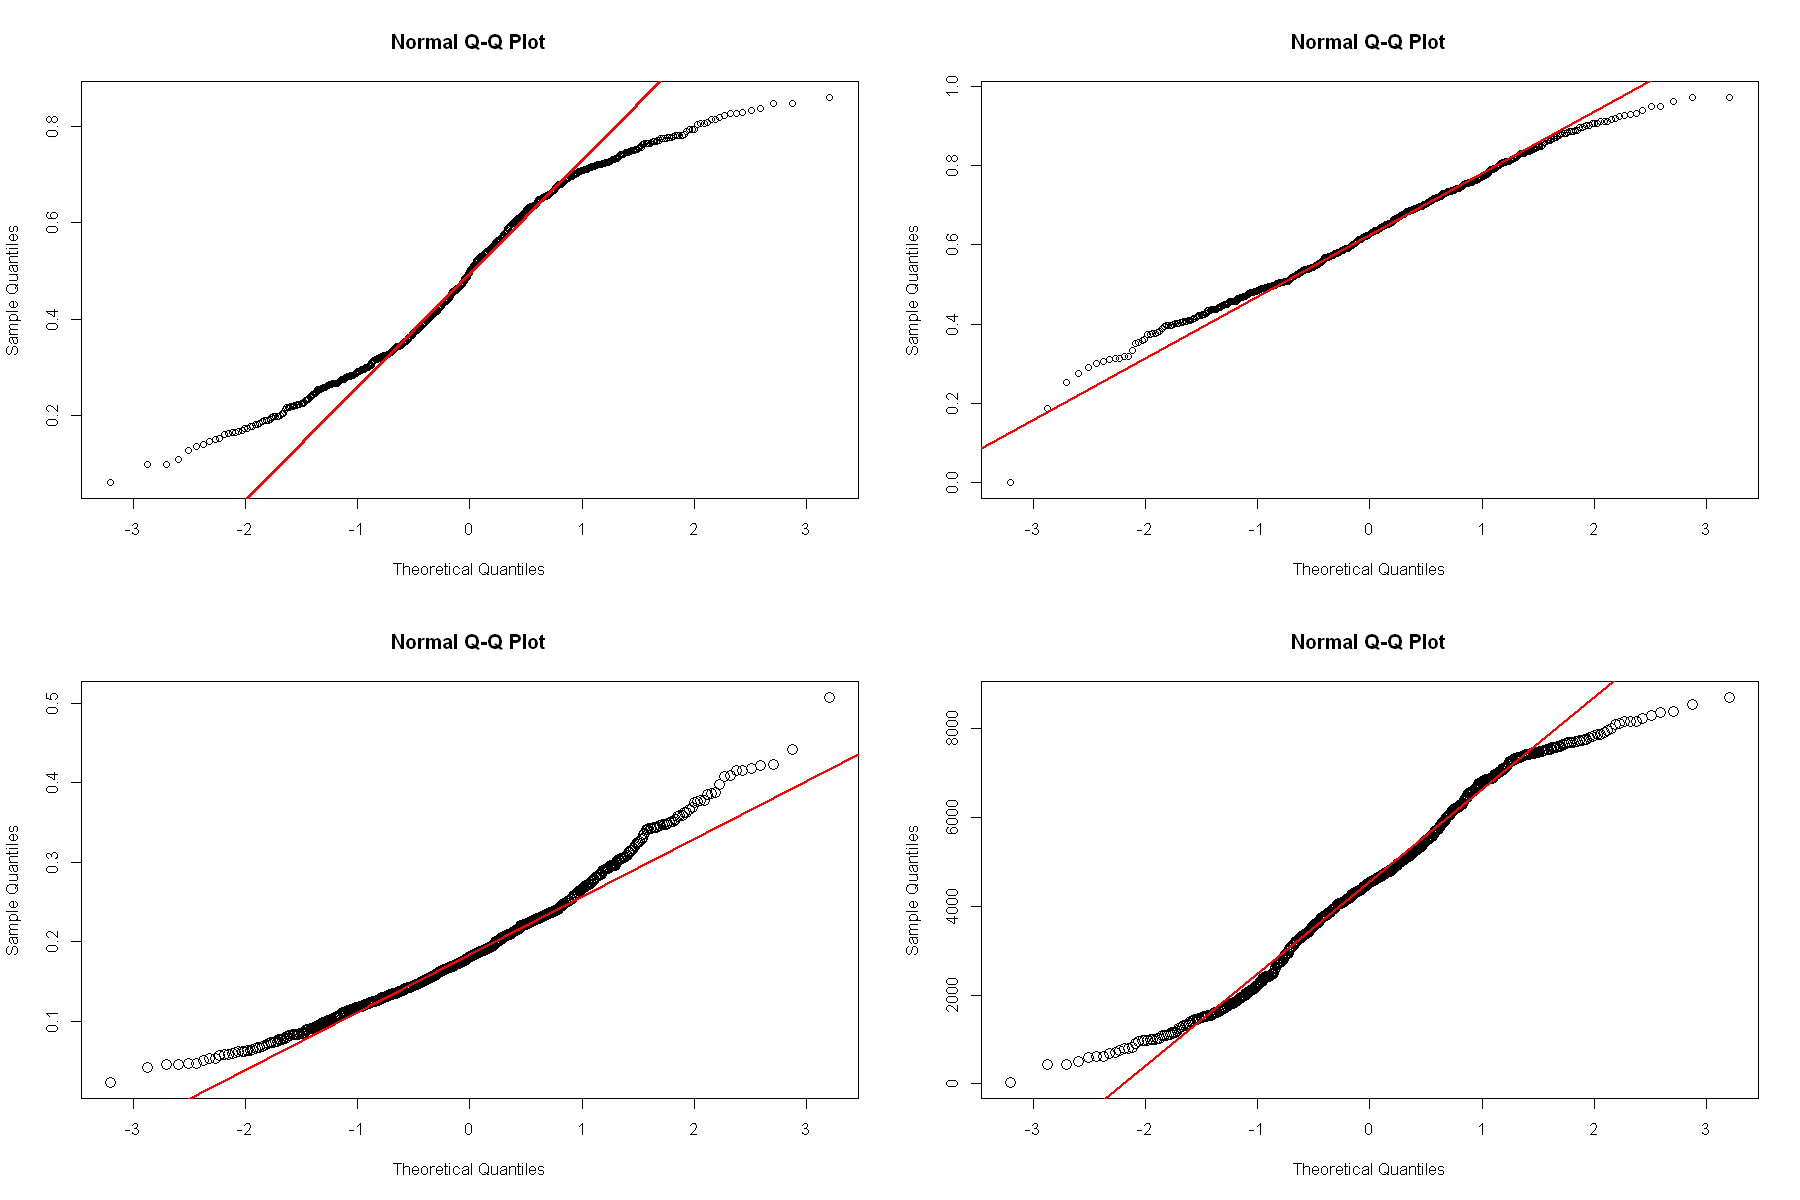

In [33]:
par(mfrow=c(2,2))

qqnorm(day$temp)
qqline(day$temp, col = "red", lwd = 3)

qqnorm(day$hum)
qqline(day$hum, col = "red", lwd = 2)

qqnorm(day$windspeed, cex = 1.5)
qqline(day$windspeed, col = "red", lwd = 2)

qqnorm(day$cnt, cex = 1.5)
qqline(day$cnt, col = "red", lwd = 2)

We see that the variables, temp (top-left), humidity (top-right), windspeed (bottom-left) and cnt (bottom-right) are not normally distributed. Let us confirm the normality of the cnt variable using histograms and a test.

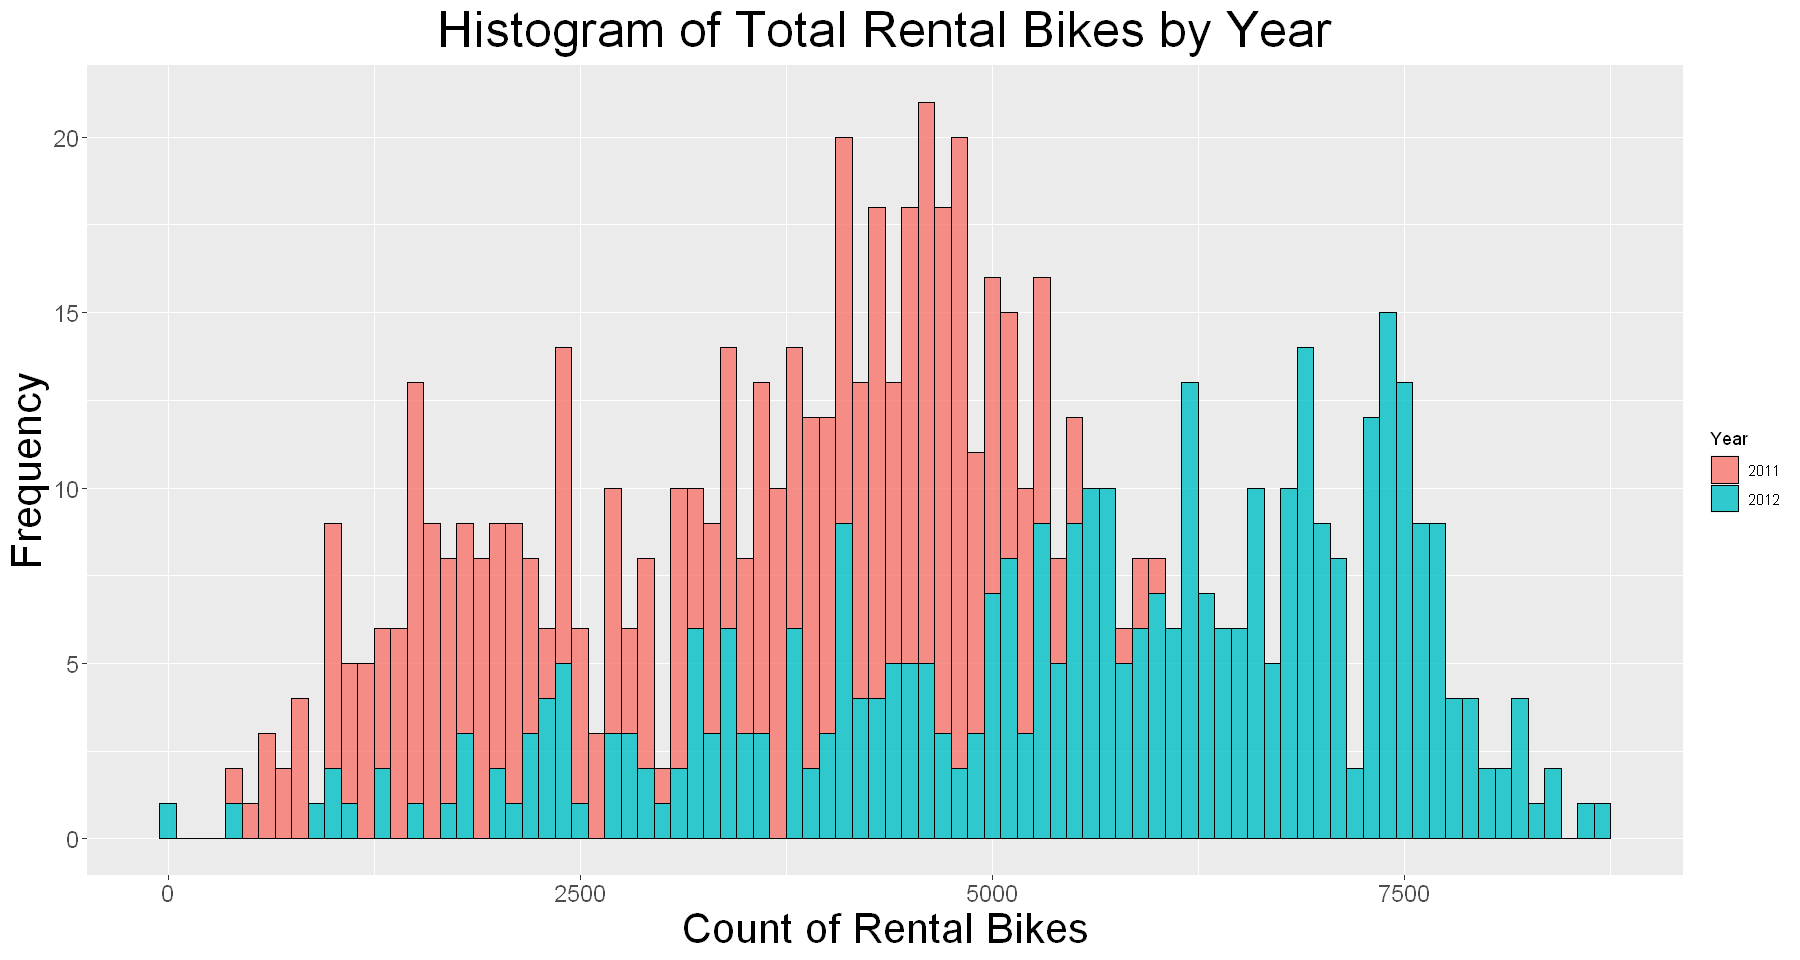

In [34]:
options(repr.plot.width = 15, repr.plot.height = 8)
ggplot(myday, aes(x = cnt, fill = factor(yr))) + 
geom_histogram(binwidth = 100, color = "black", alpha = 0.8) +
labs(title = "Histogram of Total Rental Bikes by Year", 
   x = "Count of Rental Bikes", 
   y = "Frequency") +
scale_fill_discrete(name = "Year", labels = c("2011", "2012")) +
scale_color_manual(values = c('#3493bf', '#c74448')) +
theme(axis.title.x = element_text(size = 25), 
axis.title.y = element_text(size = 25), 
plot.title = element_text(size = 30, hjust = 0.5),
axis.text.y = element_text(size = 14),
axis.text.x = element_text(size = 14)) 

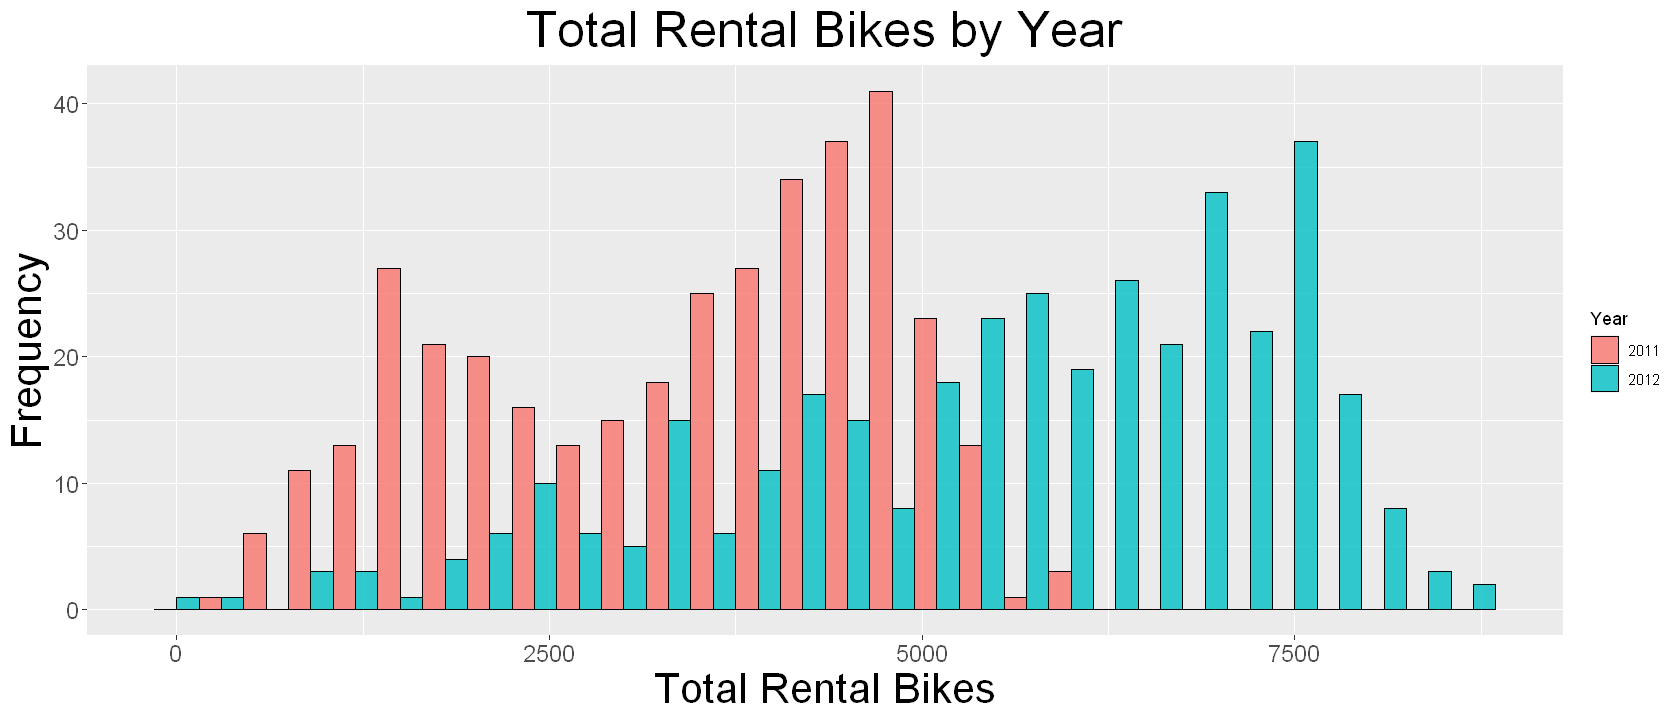

In [35]:
library(ggplot2)
options(repr.plot.width=14, repr.plot.height=6)

ggplot(myday, aes(x = cnt, fill = factor(yr))) + 
geom_histogram(binwidth = 300, color = "black", alpha = 0.8, position = "dodge") + 
labs(title = "Total Rental Bikes by Year", 
   x = "Total Rental Bikes", y = "Frequency") + 
scale_fill_discrete(name = "Year", labels = c("2011", "2012")) +
scale_color_manual(values = c('#3493bf', '#c74448')) +
theme(axis.title.x = element_text(size = 25), 
    axis.title.y = element_text(size = 25), 
    plot.title = element_text(size = 30, hjust = 0.5),
    axis.text.y = element_text(size = 14),
    axis.text.x = element_text(size = 14)) 

The graph shows us that the cnt variable is not normally distributed. A Shapiro test should corroborate this.

In [36]:
shapiro.test(myday$cnt)


	Shapiro-Wilk normality test

data:  myday$cnt
W = 0.98012, p-value = 2.081e-08


As the pvalue is really low ($\alpha$ = 0.05), we do not have enough evidence for the null hypothesis and we conclude that cnt data is not normally distributed.

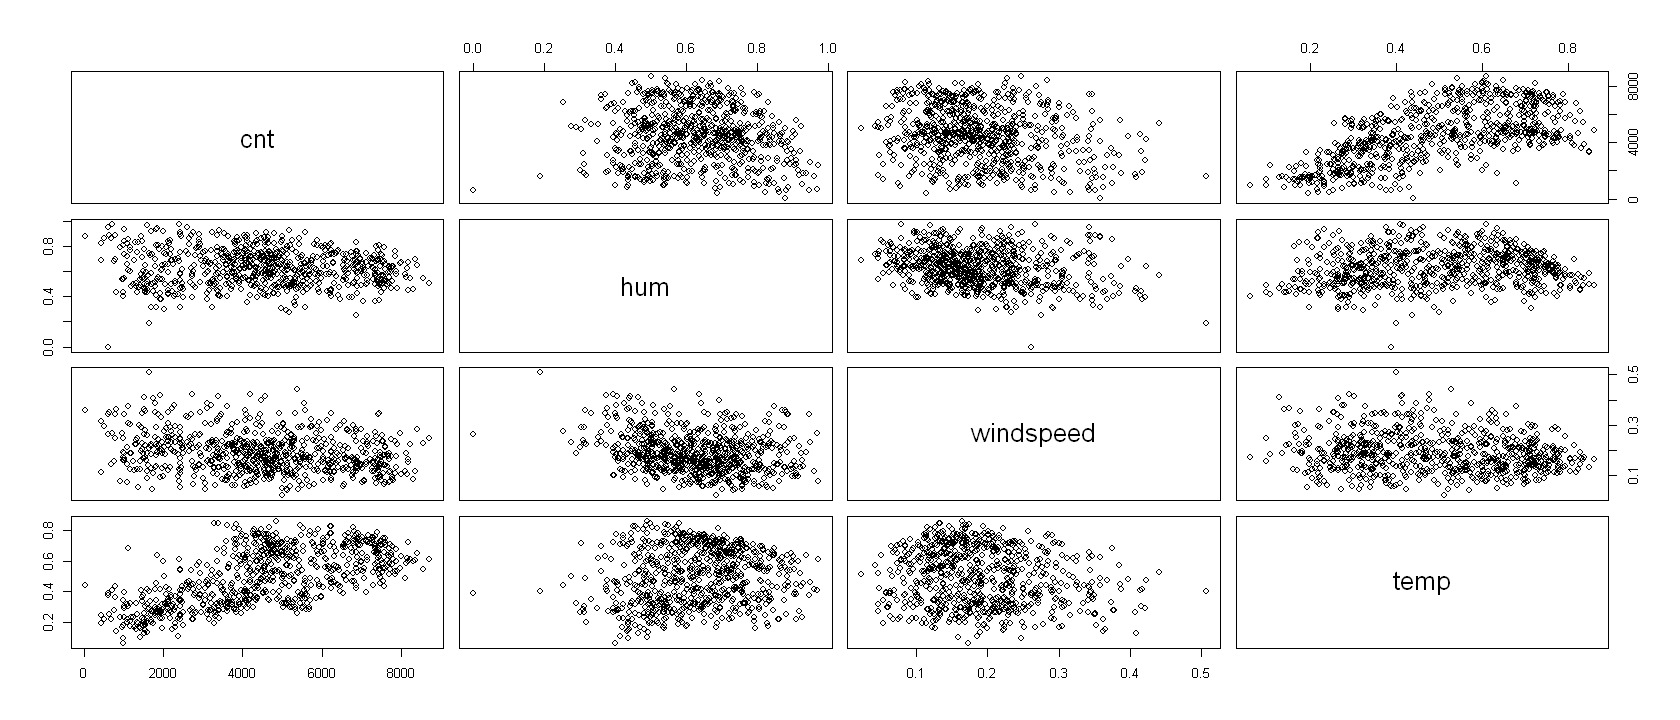

In [37]:
pairs(myday[, c("cnt", "hum", "windspeed", "temp")])

In [60]:
cor.hum[4]
cor.temp <- cor.test(x = myday$cnt, y = myday$temp)
cor.temp[4]
cor.ws <- cor.test(x = myday$cnt, y = myday$windspeed)
cor.ws[4]

$estimate
       cor 
-0.1006586

$estimate
     cor 
0.627494

$estimate
      cor 
-0.234545

* Correlation of cnt with humidity -0.1006586
* Correlation of cnt with temp 0.627494
* Correlation of cnt with windspeed -0.234545

The only `somewhat` correlation that cnt shows with is temp, it seems to have almost no correlation with humidity and windspeed.

Warning message:
"Removed 2 rows containing missing values (geom_smooth)."


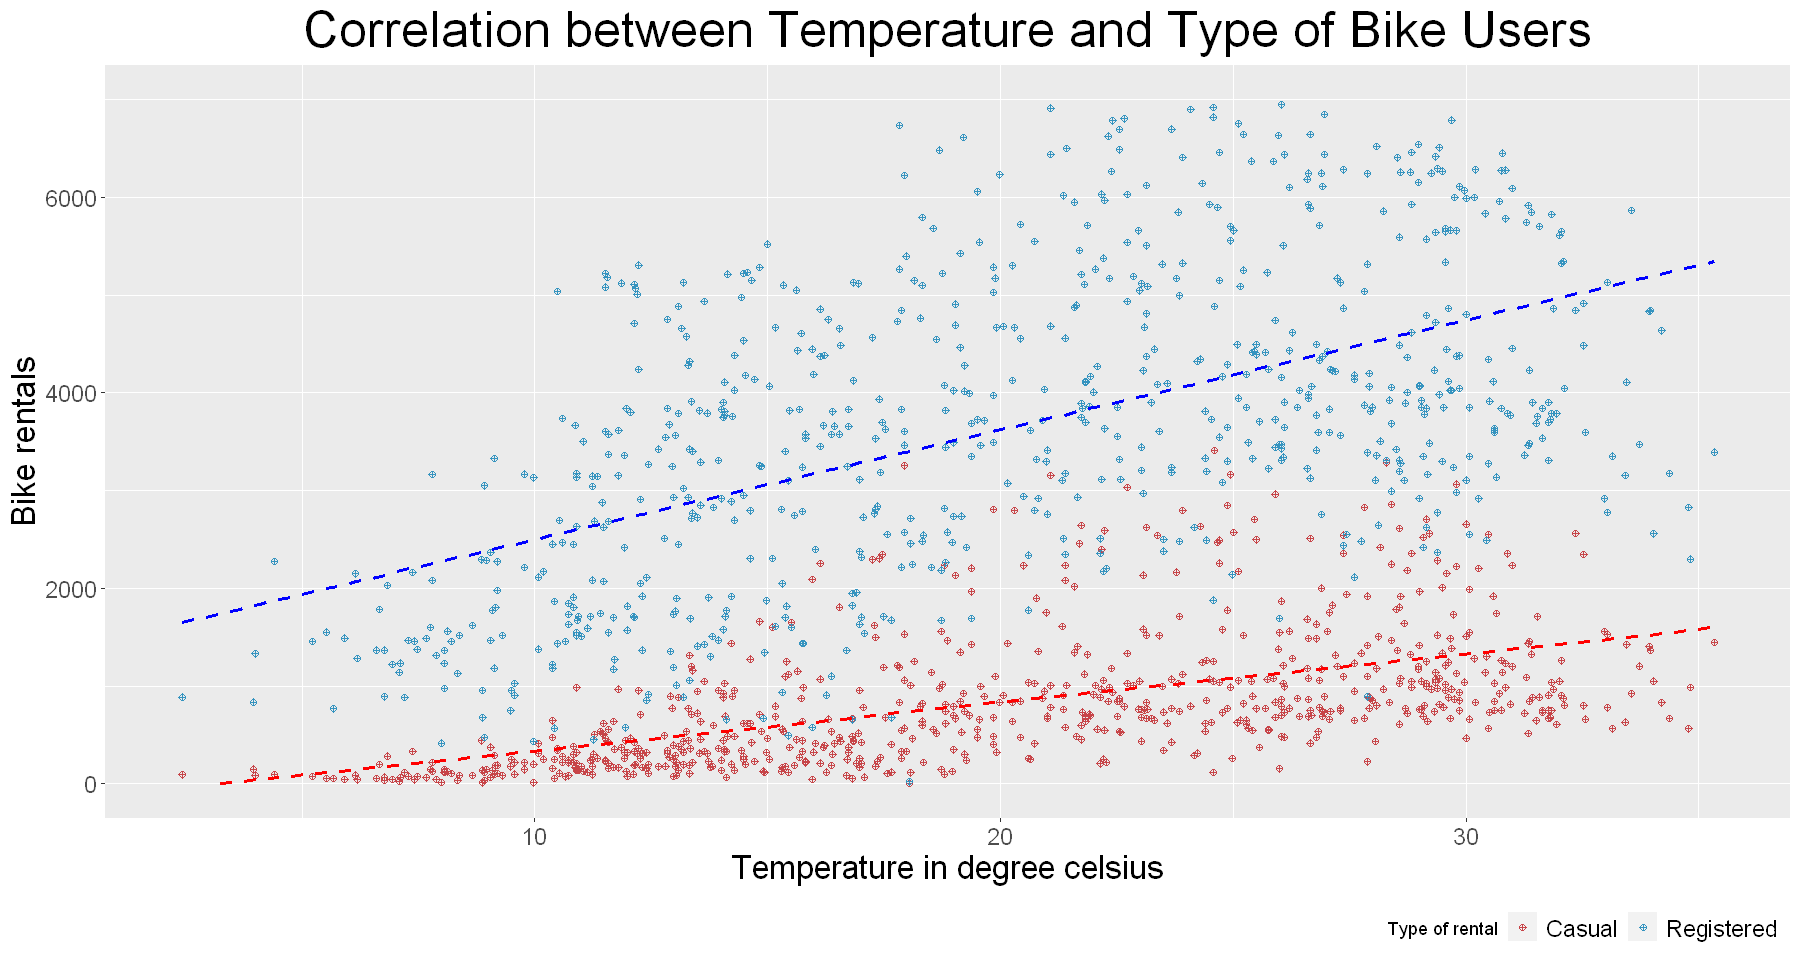

In [75]:
options(repr.plot.width = 15, repr.plot.height = 8)

ggplot(myday, aes(x = rawtemp)) +
geom_point(aes(y = casual, col = "Casual"), pch = 10) +
geom_point(aes(y = registered, col = "Registered"), pch = 10) +
scale_color_manual(name = "Type of rental", values = c("Casual" = "#c74448", "Registered" = "#3493bf")) +
labs(x = "Temperature in degree celsius", y = "Bike rentals", 
     title = "Correlation between Temperature and Type of Bike Users") +
ylim(0, 7000) +
geom_smooth(aes(y = casual), method = "lm", formula = y ~ x, se = FALSE, linetype = "dashed", col = "red") +
geom_smooth(aes(y = registered), method = "lm", formula = y ~ x, se = FALSE, linetype = "dashed", col = "blue") +
theme(axis.title.x = element_text(size = 20), 
axis.title.y = element_text(size = 20), 
plot.title = element_text(size = 30, hjust = 0.5),
legend.position = "bottom", legend.justification = "right",
legend.text = element_text(size = 14),
axis.text.x = element_text(size = 14),
axis.text.y = element_text(size = 14))


## Some exploratory charts

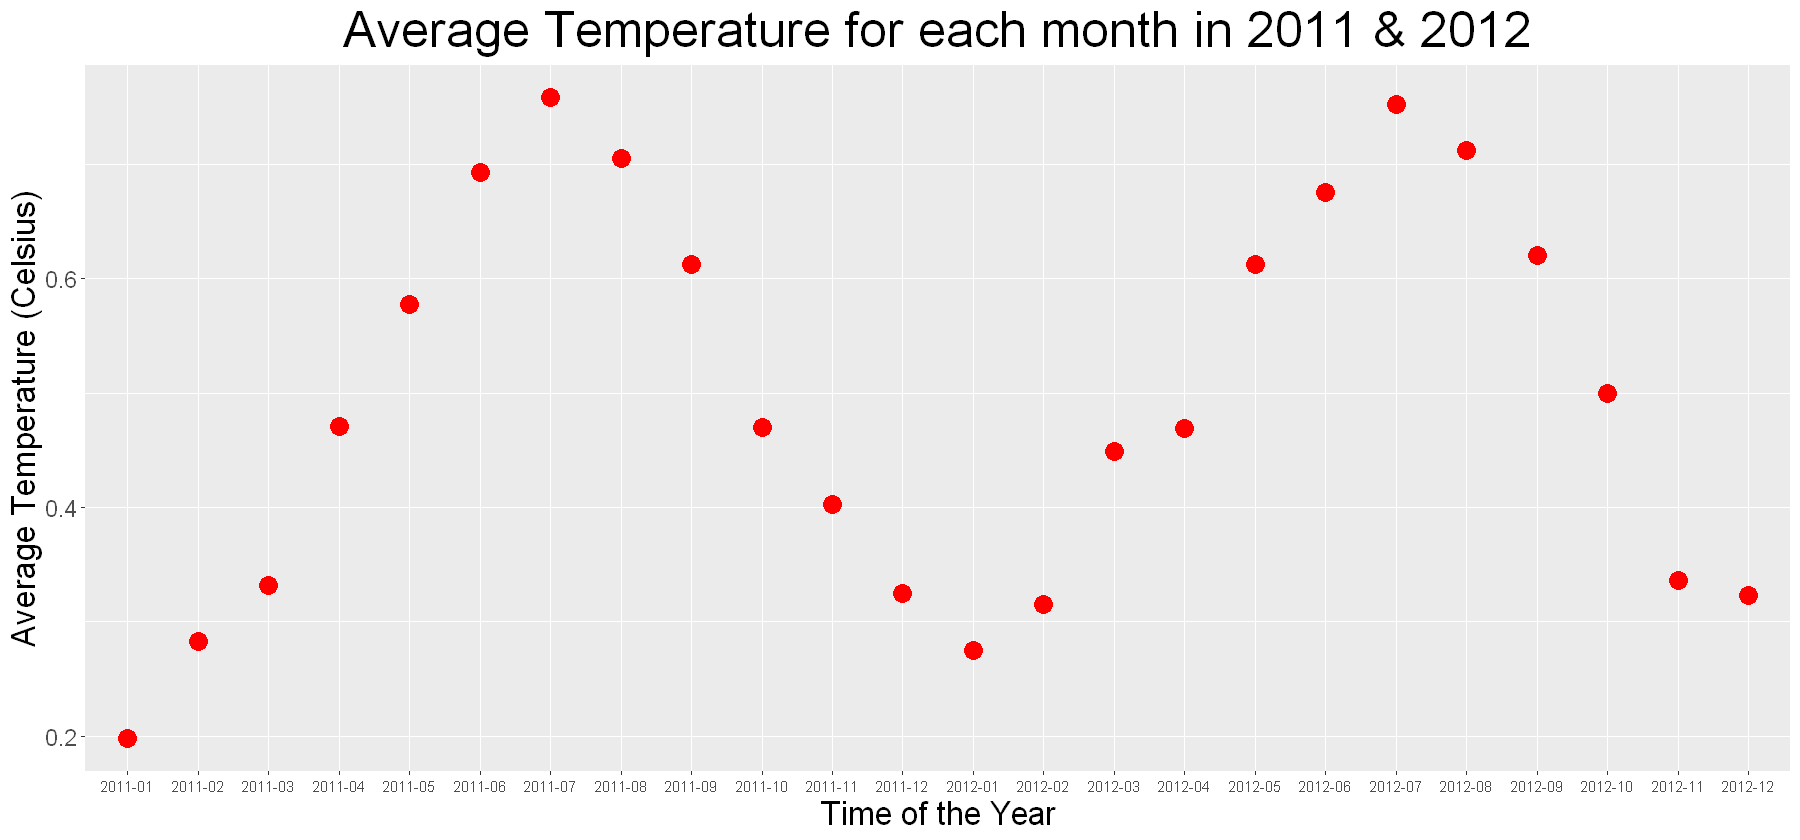

In [46]:
options(repr.plot.width = 15, repr.plot.height = 7)

# aggregating data by month & year
df <- day %>% 
    mutate(month_year = format(dteday, "%Y-%m")) %>% 
    select(month_year, temp)

# calculate average temperature by month and year
df_avg <- df %>% 
  group_by(month_year) %>% 
  summarise(avg_temp = mean(temp))

# draw the plot
ggplot(df_avg, aes(x = month_year, y = avg_temp)) + 
geom_point(size = 5, color = "red") +
labs(x = "Time of the Year", y = "Average Temperature (Celsius)") +
ggtitle("Average Temperature for each month in 2011 & 2012") +
theme(axis.title.x = element_text(size = 20), 
      axis.title.y = element_text(size = 20), 
      plot.title = element_text(size = 30, hjust = 0.5),
      axis.text.y = element_text(size = 14)) +
scale_x_discrete(breaks = df_avg$month_year, labels = df_avg$month_year)


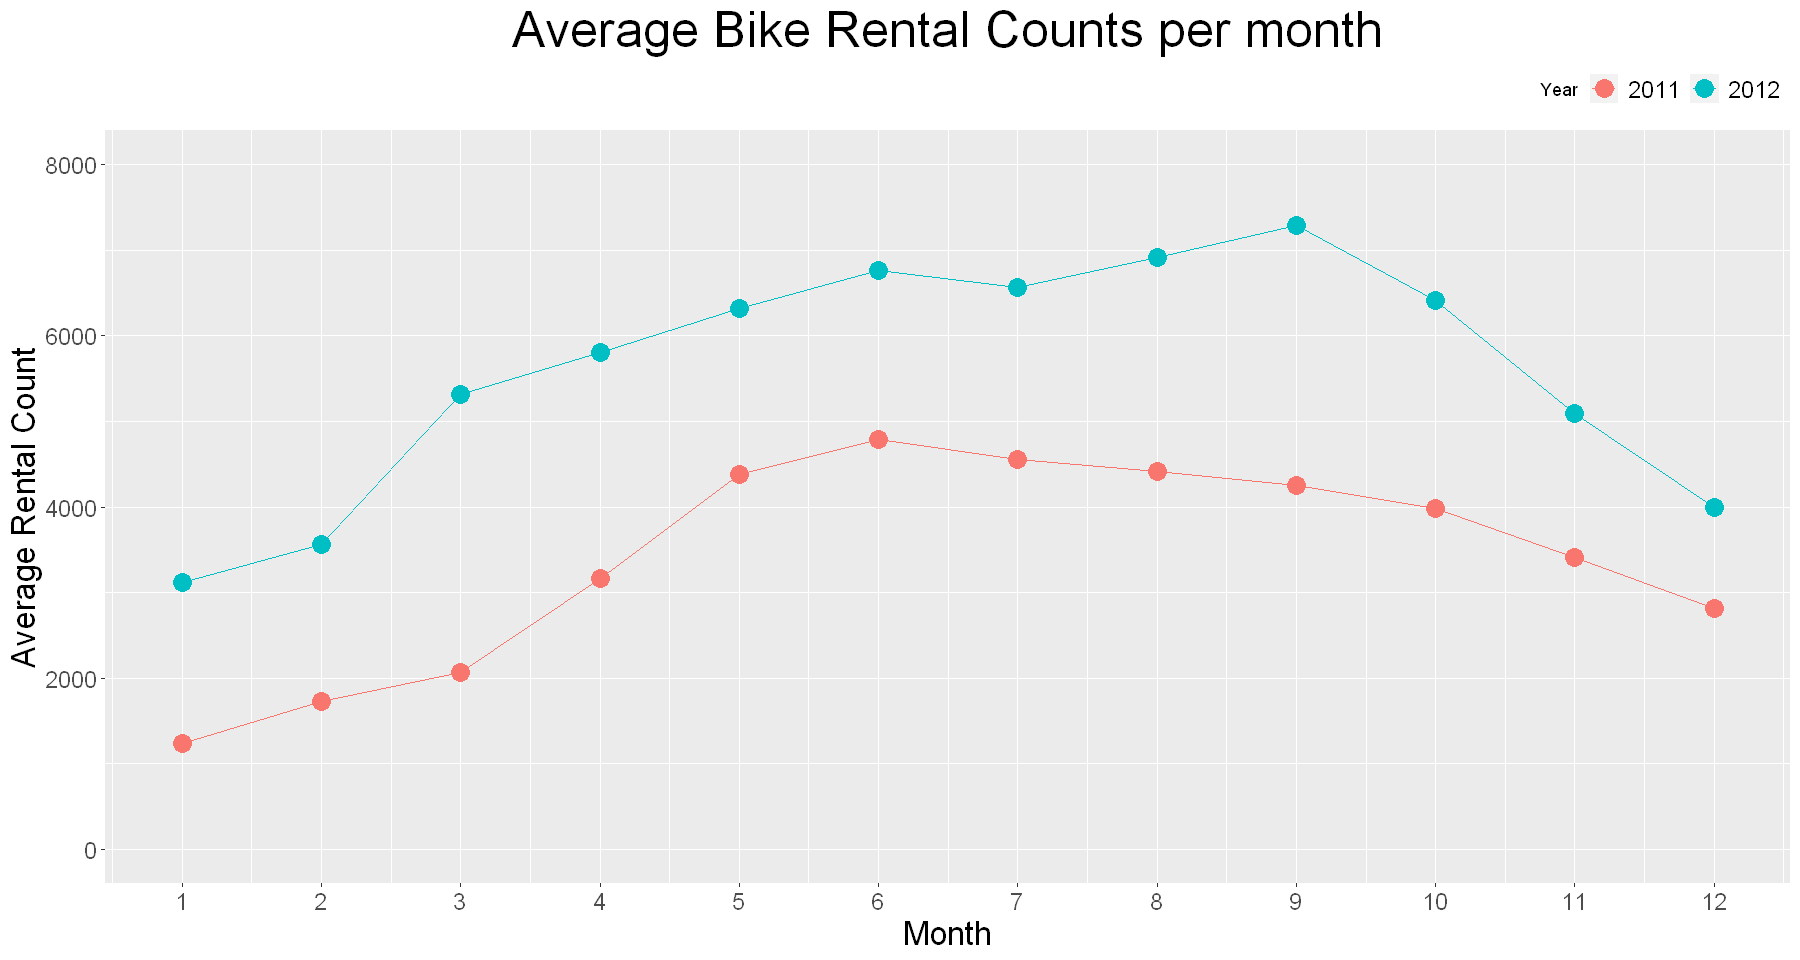

In [42]:
options(repr.plot.width = 15, repr.plot.height = 8)

# creating monthly averages for the year 2011
year_2011 <- subset(myday, yr == 0)
avg_counts_2011 <- aggregate(cnt ~ mnth, data = year_2011, FUN = mean)
avg_counts_2011$yr = 2011
avg_counts_2011$yr = factor(avg_counts_2011$yr)

# creating monthly averages for the year 2012
year_2012 <- subset(myday, yr == 1)
avg_counts_2012 <- aggregate(cnt ~ mnth, data = year_2012, FUN = mean)
avg_counts_2012$yr = 2012
avg_counts_2012$yr = factor(avg_counts_2012$yr)

# combining monthly averages for both the months
myavg = rbind(avg_counts_2011, avg_counts_2012)

ggplot(myavg, aes(x = mnth, y = cnt, color = yr)) +
geom_point(size= 5) +
geom_line() +
labs(title = "Average Bike Rental Counts per month",
    x = "Month",
    y = "Average Rental Count",
    color = "Year") +
theme(axis.title.x = element_text(size = 20), 
    axis.title.y = element_text(size = 20), 
    plot.title = element_text(size = 30, hjust = 0.5),
    legend.position = "top", legend.justification = "right",
    legend.text = element_text(size = 14),
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14)) +
scale_x_continuous(breaks = seq(1, 12, by = 1)) + 
scale_y_continuous(limits = c(0, 8000), breaks = seq(0, 8000, 2000))

`geom_smooth()` using formula 'y ~ x'



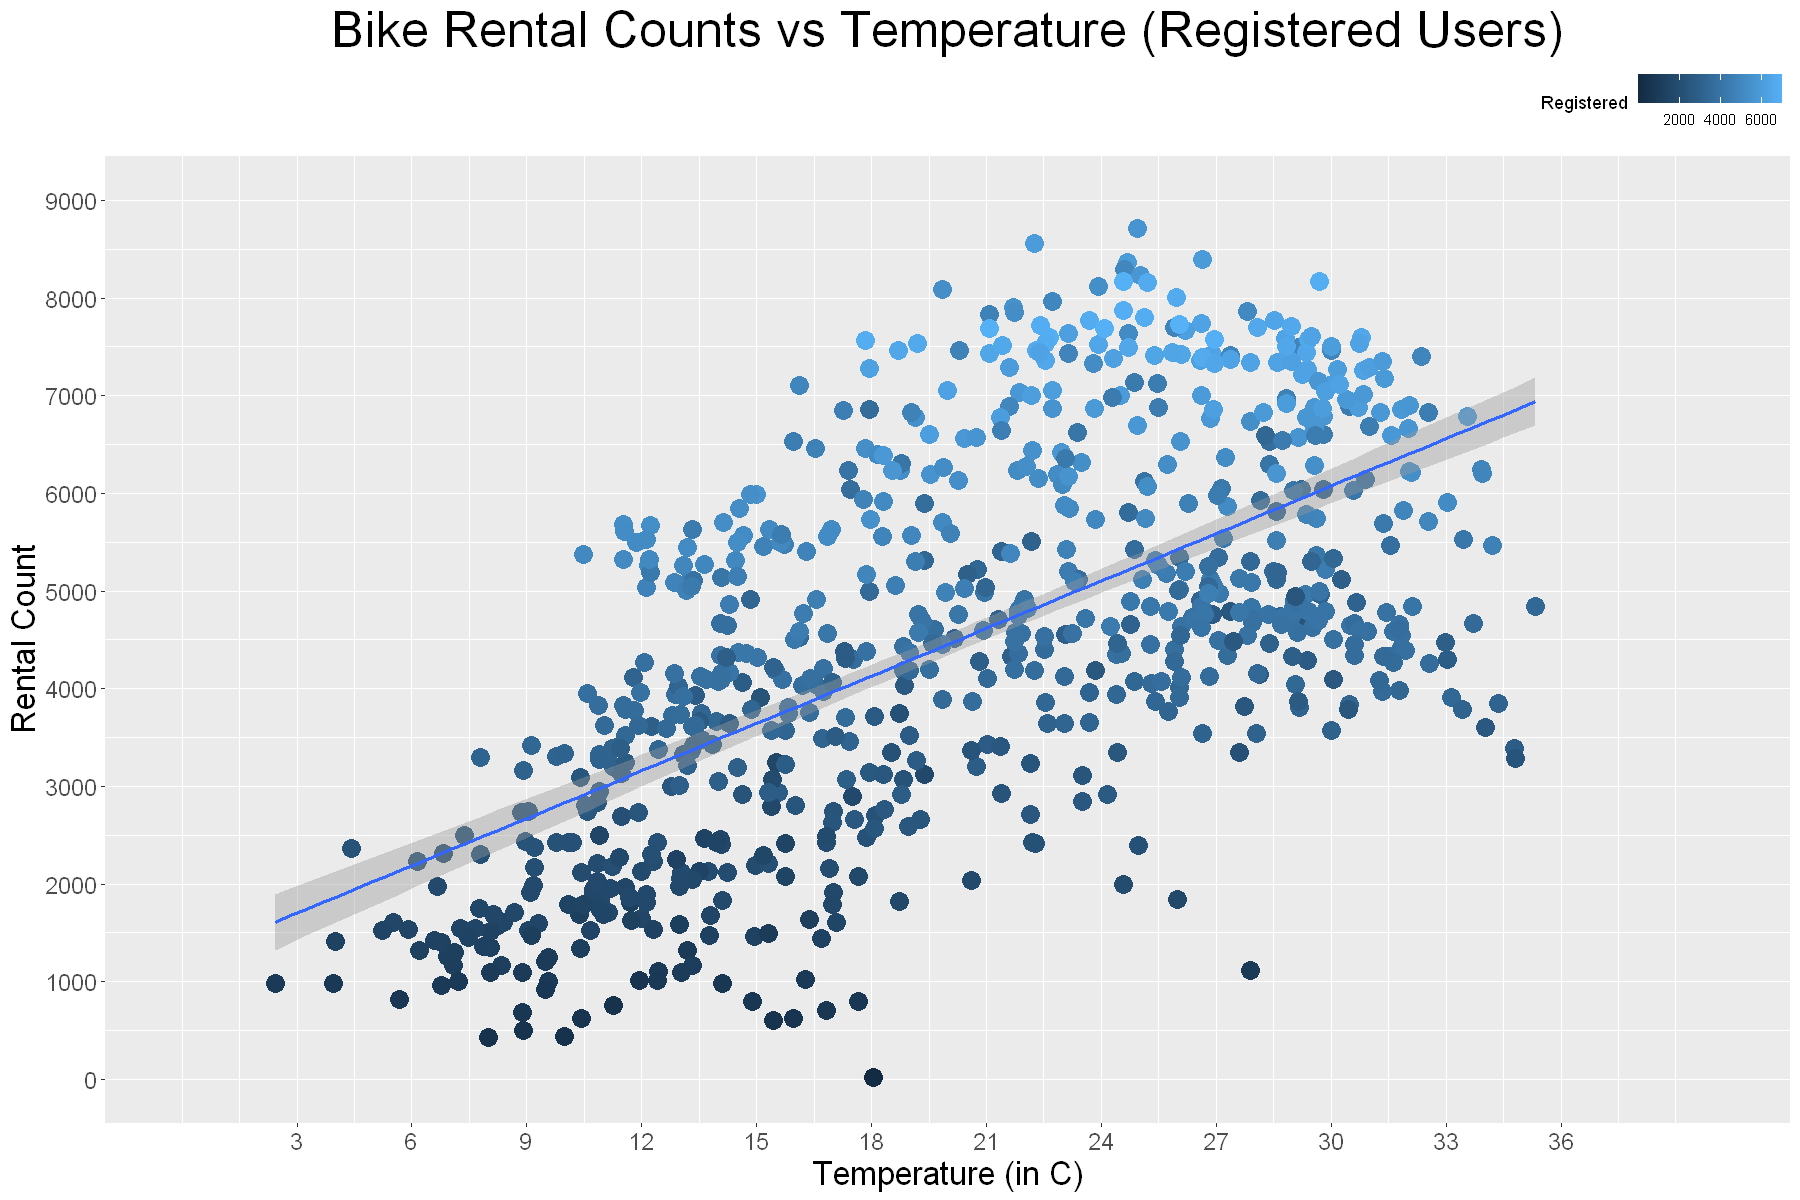

In [51]:
options(repr.plot.width = 15, repr.plot.height = 10)

ggplot(myday, aes(x = rawtemp, y = cnt, color = registered)) +
geom_point(size= 5) +
labs(title = c("Bike Rental Counts vs Temperature (Registered Users)"),
    x = "Temperature (in C)",
    y = "Rental Count",
    color = "Registered") +
geom_smooth(method='lm') +
theme(axis.title.x = element_text(size = 20), 
    axis.title.y = element_text(size = 20), 
    plot.title = element_text(size = 30, hjust = 0.5),
    legend.position = "top", legend.justification = "right",
    legend.text = element_text(size = 9),
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14)) +
scale_x_continuous(limits = c(0, 40), breaks = seq(3, 36, by=3 )) +
scale_y_continuous(limits = c(0, 9000), breaks = seq(0, 9000, 1000))

Warning message:
"Removed 2 rows containing missing values (geom_smooth)."


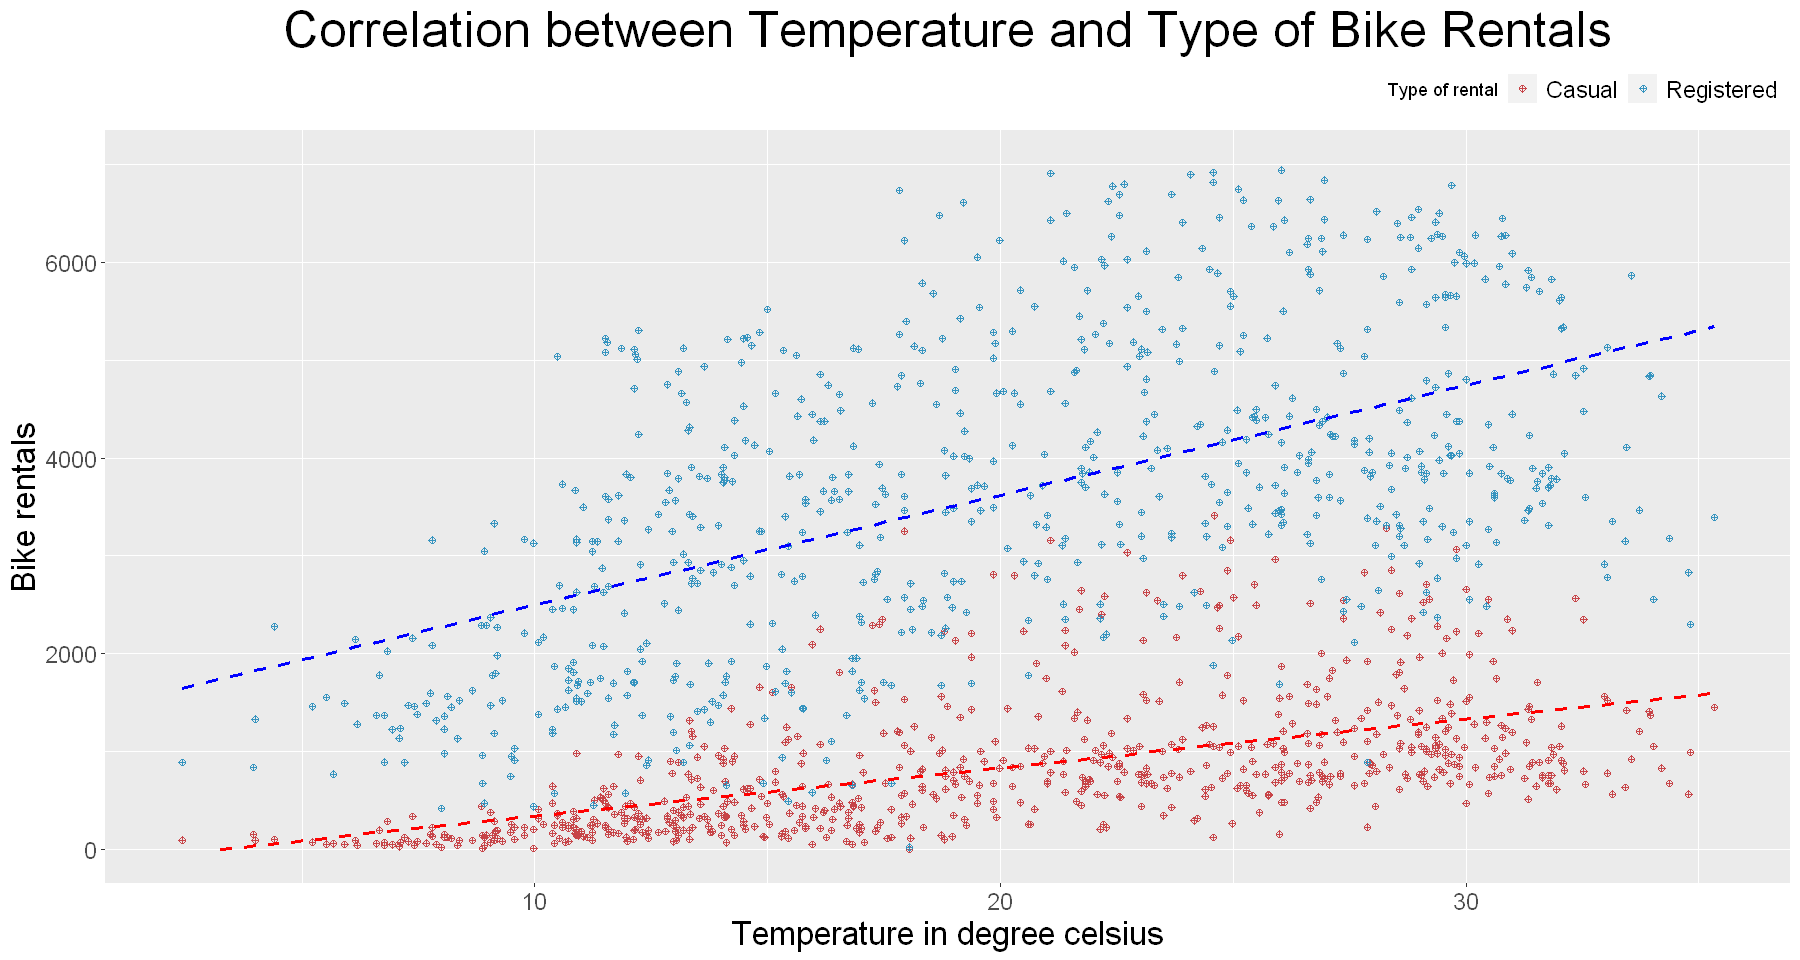

In [76]:
ggplot(myday, aes(x = rawtemp)) +
geom_point(aes(y = casual, col = "Casual"), pch = 10) +
geom_point(aes(y = registered, col = "Registered"), pch = 10) +
scale_color_manual(name = "Type of rental", values = c("Casual" = "#c74448", "Registered" = "#3493bf")) +
labs(x = "Temperature in degree celsius", y = "Bike rentals", 
     title = "Correlation between Temperature and Type of Bike Rentals") +
ylim(0, 7000) +
geom_smooth(aes(y = casual), method = "lm", formula = y ~ x, se = FALSE, linetype = "dashed", col = "red") +
geom_smooth(aes(y = registered), method = "lm", formula = y ~ x, se = FALSE, linetype = "dashed", col = "blue") +
theme(axis.title.x = element_text(size = 20), 
axis.title.y = element_text(size = 20), 
plot.title = element_text(size = 30, hjust = 0.5),
legend.position = "top", legend.justification = "right",
legend.text = element_text(size = 14),
axis.text.x = element_text(size = 14),
axis.text.y = element_text(size = 14))
